# Project 1: SAT & ACT Analysis - by Elton Yeo, DSI13

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The problem statement is how to improve SAT participation rates, especially in states which already have their own internal assessments, such as Iowa. 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
import math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\elton\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:

sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:

sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
SAT participation vs. ACT participation: participation for SAT varies from 3% to 100 % whereas that for ACT varies from 18% to 100%. There appears to be negative correlation between SAT and ACT participation in each year, suggesting that students who take one test, typically do not take the other. 

SAT total and ACT composite: generally, the lower the participation, the higher the total/composite score for each state, and the higher the participation, the lower the total/composite score for each state. 

Outliers and possible errors: there is an 'x' in one of the fields for scores, and there are two outlier values which are much lower than all other values. 

#### 4a. Does the data look complete? 

Answer: No. There appears to be outliers in sat_2017_math scores (min of 52) and act_2017 science scores (min of 2.3). These outlier values could be incomplete values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:For the ACT table, there is an x in the composite value for Wyoming. As mentioned in 4a, there are outliers in sat_2017_math scores (min of 52) and act_2017 science scores (min of 2.3).

Maximum possible value for SAT subtest is 800 each, for a total of 1600. Minimum possible value for SAT subtest is 200 each, for a total of 400.

Maximum possible value for ACT subtest is 36 each, for a  composite score of 36. Minimum possible value for ACT subtest is 1 each, for a  composite score of 1.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#replacing value of 2.3 with actual value of 23.2

act_2017['Science'] = act_2017['Science'].replace(2.3, 23.2)

In [6]:
#confirming that incorrect value has been replaced

act_2017.Science[21]

23.2

In [7]:
#replacing value of 52 with actual value of 524

sat_2017['Math'] = sat_2017['Math'].replace(52, 524)

In [8]:
#confirming that incorrect value has been replaced

sat_2017['Math'][20]

524

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#displaying data types for sat_2017

sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
#displaying data types for act_2017

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Except for state, all other values should be numeric i.e int or float. For participation which is in percentages, and is currently in strings, to also switch to float so that it can be easily manipulated if necessary. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
# stripping "%" from obj, converting it to float, and then dividing that by 100

def to_float(obj):
    return float(obj.strip('%'))/100


In [12]:
#applying the above function to all objects in 'Participation' column in sat_2017

sat_2017['Participation'] = sat_2017['Participation'].apply(to_float)

In [13]:
#confirming that all objects in 'Participation' column in sat_2017 are now floats

sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [14]:
#applying the above function to all objects in 'Participation' column in act_2017

act_2017['Participation'] = act_2017['Participation'].apply(to_float)

In [15]:
#confirming that all objects in 'Participation' column in act_2017 are now floats

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
#showing that the value in row 51 of composite column in act_2017 has an unwanted 'x'

act_2017['Composite'].tail()

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [17]:
#removing the 'x' from the value

act_2017["Composite"].replace("20.2x", "20.2", inplace=True)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#converting all values in composite column in act_2017 to floats

act_2017['Composite'] = act_2017['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [19]:
#confirming that all values in 'Composite' column in act_2017 are now floats

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [21]:
#renaming all columns in sat_2017

sat_2017.columns = ['state', 'sat_2017_participation', 'sat_2017_english', 'sat_2017_math', 'sat_2017_total']

#confirming that the columns have been renamed
sat_2017.head()

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [22]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [23]:
#renaming all columns in act_2017

act_2017.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 
                    'act_2017_reading', 'act_2017_science', 'act_2017_composite']

#confirming that the columns have been renamed
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**participation**|*float*|ACT/SAT 2017/18|The number of college students who take SAT or ACT in any year out of the whole high school graduating class population | 
|**composite**|*float*|ACT 2017/18|The weighted average score of ACT from English, Math, Reading and Science components| 
|**total**|*integer*|SAT 2017/18|The combined total score of SAT from Evidence Based Reading and Writing and Math components|
|**math**|*SAT-integer ACT-float*|ACT/SAT 2017/18|The Math ACT/SAT score in a respective year| 
|**reading**|*float*|ACT 2017/18|The Reading ACT score in a respective year| 
|**english**|*float*|ACT 2017/18|The English ACT score in a respective year| 
|**science**|*float*|ACT 2017/18|The Science ACT score in a respective year|
|**evidence-based reading and writing**|*integer*|SAT 2017/18|The Evidence Based Reading and Writing score in a respective year|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#dropping row 0 in act_2017

act_2017 = act_2017.drop([0], axis = 0)

In [25]:
#confirming that row 0 in act_2017 has been dropped

act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#joining 2017 ACT and SAT dataframes using the state in each dataframe as the key. assigned to combined_2017

combined_2017 = pd.merge(sat_2017, act_2017, on='state')

In [27]:
combined_2017.head()

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
#save out data as combined_2017.csv

combined_2017.to_csv('combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
#read in the sat_2018.csv and act_2018_updated.csv files and assign them to appropriately named pandas dataframes

sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')


In [30]:
#remove percentage sign from participation and convert participation from string to float in sat_2018

sat_2018['Participation'] = sat_2018['Participation'].apply(to_float)

#convert Percentage of Students Tested from string to float in sat_2018

act_2018['Percentage of Students Tested'] = (act_2018['Percentage of Students Tested'].astype(float))/100

In [31]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [32]:
#change column names in sat_2018

sat_2018.columns = ['state', 'sat_2018_participation', 'sat_2018_english', 'sat_2018_math', 'sat_2018_total']

sat_2018.head()

,state,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [33]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [34]:
#change column names in act_2018

act_2018.columns = ['state', 'act_2018_participation', 'act_2018_composite', 'act_2018_english', 'act_2018_math', 
                    'act_2018_reading', 'act_2018_science']

act_2018.head()

,state,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [35]:
#joining 2018 ACT and SAT dataframes using the state in each dataframe as the key. assigned to combined_2018

combined_2018 = pd.merge(sat_2018, act_2018, on='state')

In [36]:
#confirming the join

combined_2018.tail()

,state,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
46,Virginia,0.68,567,550,1117,0.24,23.9,23.8,23.3,24.7,23.5
47,Washington,0.69,543,538,1081,0.24,22.2,21.4,22.2,22.7,22.0
48,West Virginia,0.28,513,486,999,0.65,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,0.03,641,653,1294,1.00,20.5,19.8,20.3,20.6,20.8
50,Wyoming,0.03,633,625,1257,1.00,20.0,19.0,19.7,20.6,20.3


In [37]:
#save out data as combined_2018.csv

combined_2018.to_csv('combined_2018.csv', index = False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [38]:
#joining 2018 ACT and SAT dataframes using the state in each dataframe as the key. assigned to combined_2018

final = pd.merge(combined_2017, combined_2018, on='state')

In [39]:
final.head()

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [40]:
#save out data as final.csv

final.to_csv('final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
final.describe()

,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
def stan_dev(data, dataset):
    n = dataset[data].count()
    mu = dataset[data].mean()
    list = [(x-mu)**2 for x in dataset[data]]
    
    return math.sqrt((1/n)*sum(list))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
#for all columns with values of dtype float or int, apply the stan_dev function to the value  
#and assign the value to the key, which will be the column name

{col:stan_dev(col, final) for col in final.iloc[:,1:]}

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_english': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3694661922353942,
 'sat_2018_english': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543}

In [44]:
#testing numpy's std method

np.std(final, axis = 0)

sat_2017_participation     0.349291
sat_2017_english          45.216970
sat_2017_math             46.657134
sat_2017_total            91.583511
act_2017_participation     0.318242
act_2017_english           2.330488
act_2017_math              1.962462
act_2017_reading           2.046903
act_2017_science           1.722216
act_2017_composite         2.000786
sat_2018_participation     0.369466
sat_2018_english          47.034610
sat_2018_math             47.301946
sat_2018_total            93.227424
act_2018_participation     0.337452
act_2018_composite         2.085526
act_2018_english           2.422254
act_2018_math              2.015707
act_2018_reading           2.145892
act_2018_science           1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No, there is a small difference. Numpy's std method produces similar figures as the manually calculated standard deviations. Therefore it also has a small difference compared against the output from pandas describe.  

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [45]:
#states with highest participation rate for 2017 SAT

final[['state', 'sat_2017_participation']].sort_values('sat_2017_participation', ascending=False).head()

,state,sat_2017_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [46]:
#states with lowest participation rate for 2017 SAT

final[['state', 'sat_2017_participation']].sort_values('sat_2017_participation', ascending=True).head()

,state,sat_2017_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


States with highest participation rate for 2017 SAT are DC, Michigan, Connecticut, Delaware with 100% participation.

States with lowest participation rate for 2017 SAT are North Dakota, Mississippi, Iowa with 2% participation.

In [47]:
#state with highest participation rate for 2018 SAT

final[['state', 'sat_2018_participation']].sort_values('sat_2018_participation', ascending=False).head()

,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [48]:
#state with lowest participation rate for 2018 SAT

final[['state', 'sat_2018_participation']].sort_values('sat_2018_participation', ascending=True).head()

,state,sat_2018_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


States with highest participation rate for 2018 SAT are Colorado, Connecticut, Delaware, Michigan, Idaho with 100% participation.

States with lowest participation rate for 2018 SAT are North Dakota with 2% participation.

In [49]:
#state with highest participation rate for 2017 ACT

final[['state', 'act_2017_participation']][final['act_2017_participation'] == 1.00]

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


In [50]:
#state with lowest participation rate for 2017 ACT

final[['state', 'act_2017_participation']].sort_values('act_2017_participation', ascending=True).head()

,state,act_2017_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


States with highest participation rate for 2017 ACT are Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming with 100% participation.

State with lowest participation rate for 2017 ACT are Maine with 8% participation.

In [51]:
#state with highest participation rate for 2018 ACT

final[['state', 'act_2018_participation']][final['act_2018_participation'] == 1.00]

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


In [52]:
#state with lowest participation rate for 2018 ACT

final[['state', 'act_2018_participation']].sort_values('act_2018_participation', ascending=True).head()

,state,act_2018_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


States with highest participation rate for 2018 ACT are Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Caarolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming with 100% participation.

States with lowest participation rate for 2018 ACT are Maine with 7% participation.

In [53]:
# state with the highest total score for 2017 SAT 

final[['state', 'sat_2017_total']].sort_values('sat_2017_total', ascending=False).head()

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [54]:
# state with the lowest total score for 2017 SAT 

final[['state', 'sat_2017_total']].sort_values('sat_2017_total', ascending=True).head()

,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


Minnesota had highest total score of 1295 for SAT 2017.
DC had lowest score of 950 for SAT 2017. 

In [55]:
# state with the highest total score for 2018 SAT 

final[['state', 'sat_2018_total']].sort_values('sat_2018_total', ascending=False).head()

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [56]:
# state with the lowest total score for 2018 SAT 

final[['state', 'sat_2018_total']].sort_values('sat_2018_total', ascending=True).head()

,state,sat_2018_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


Minnesota had highest total score of 1298 for SAT 2018.
DC had lowest score of 977 for SAT 2018. 

In [57]:
# state with the highest total score for 2017 ACT 

final[['state', 'act_2017_composite']].sort_values('act_2017_composite', ascending=False).head()

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [58]:
# state with the lowest total score for 2017 ACT 

final[['state', 'act_2017_composite']].sort_values('act_2017_composite', ascending=True).head()

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


New Hampsire had highest total score of 25.5 for ACT 2017.
Nevada had lowest score of 17.8 for ACT 2017. 

In [59]:
# state with the highest total score for 2018 ACT 

final[['state', 'act_2018_composite']].sort_values('act_2018_composite', ascending=False).head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [60]:
# state with the lowest total score for 2018 ACT 

final[['state', 'act_2018_composite']].sort_values('act_2018_composite', ascending=True).head()

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


Connecticut had highest total score of 25.6 for ACT 2018.
Nevada had lowest score of 17.7 for ACT 2018. 

In [61]:
#Do any states with 100% participation on SAT test have a rate change year-to-year?

final[(final['sat_2017_participation'] == 1.00) & (final['sat_2018_participation'] != 1.00)]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
8,District of Columbia,1.0,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,23.6,23.7,22.7,24.4,23.0


In [62]:
#Do any states with 100% participation on ACT test have a rate change year-to-year?

final[(final['act_2017_participation'] == 1.00) & (final['act_2018_participation'] != 1.00)]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,23.9,23.2,24.4,23.5
23,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,...,0.04,643,655,1298,0.99,21.3,20.2,21.4,21.7,21.4


DC had 100% participation in SAT 2017 but dropped to 92% in 2018. 
Colorado and Minnesota had 100% in ACT 2017 but dropped to 30% and 99% respectively in 2018.

In [63]:
#Do any states have >50% participation on both tests in 2017?

final[(final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] >0.5)]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.9,19.2,19.3,21.1,19.5
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,21.4,20.9,20.7,21.2,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,480,530,1010,0.89,18.9,18.2,19.0,19.1,19.0


Florida, Georgia, and Hawaii had >50% participation on both tests in 2017. 

In [64]:
#Do any states have >50% participation on both tests in 2018?

final[(final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] >0.5)]

,state,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.9,19.2,19.3,21.1,19.5
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,21.4,20.9,20.7,21.2,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,480,530,1010,0.89,18.9,18.2,19.0,19.1,19.0
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,...,0.52,554,543,1098,1.00,19.1,18.0,19.3,19.5,19.2
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,18.3,17.3,18.2,18.6,18.5


Florida, Georgia, Hawaii, North Carolina, South Carolina had >50% participation on both tests in 2018. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [65]:
final.corr()

,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
sat_2017_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675
sat_2017_english,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872
sat_2017_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.789166,0.800380,0.878982,0.849583,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104
sat_2017_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698
act_2017_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334
act_2017_english,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.679643,-0.347978,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873
act_2017_math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087
act_2017_reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420
act_2017_science,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.647635,-0.320049,-0.315431,-0.321679,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334
act_2017_composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847


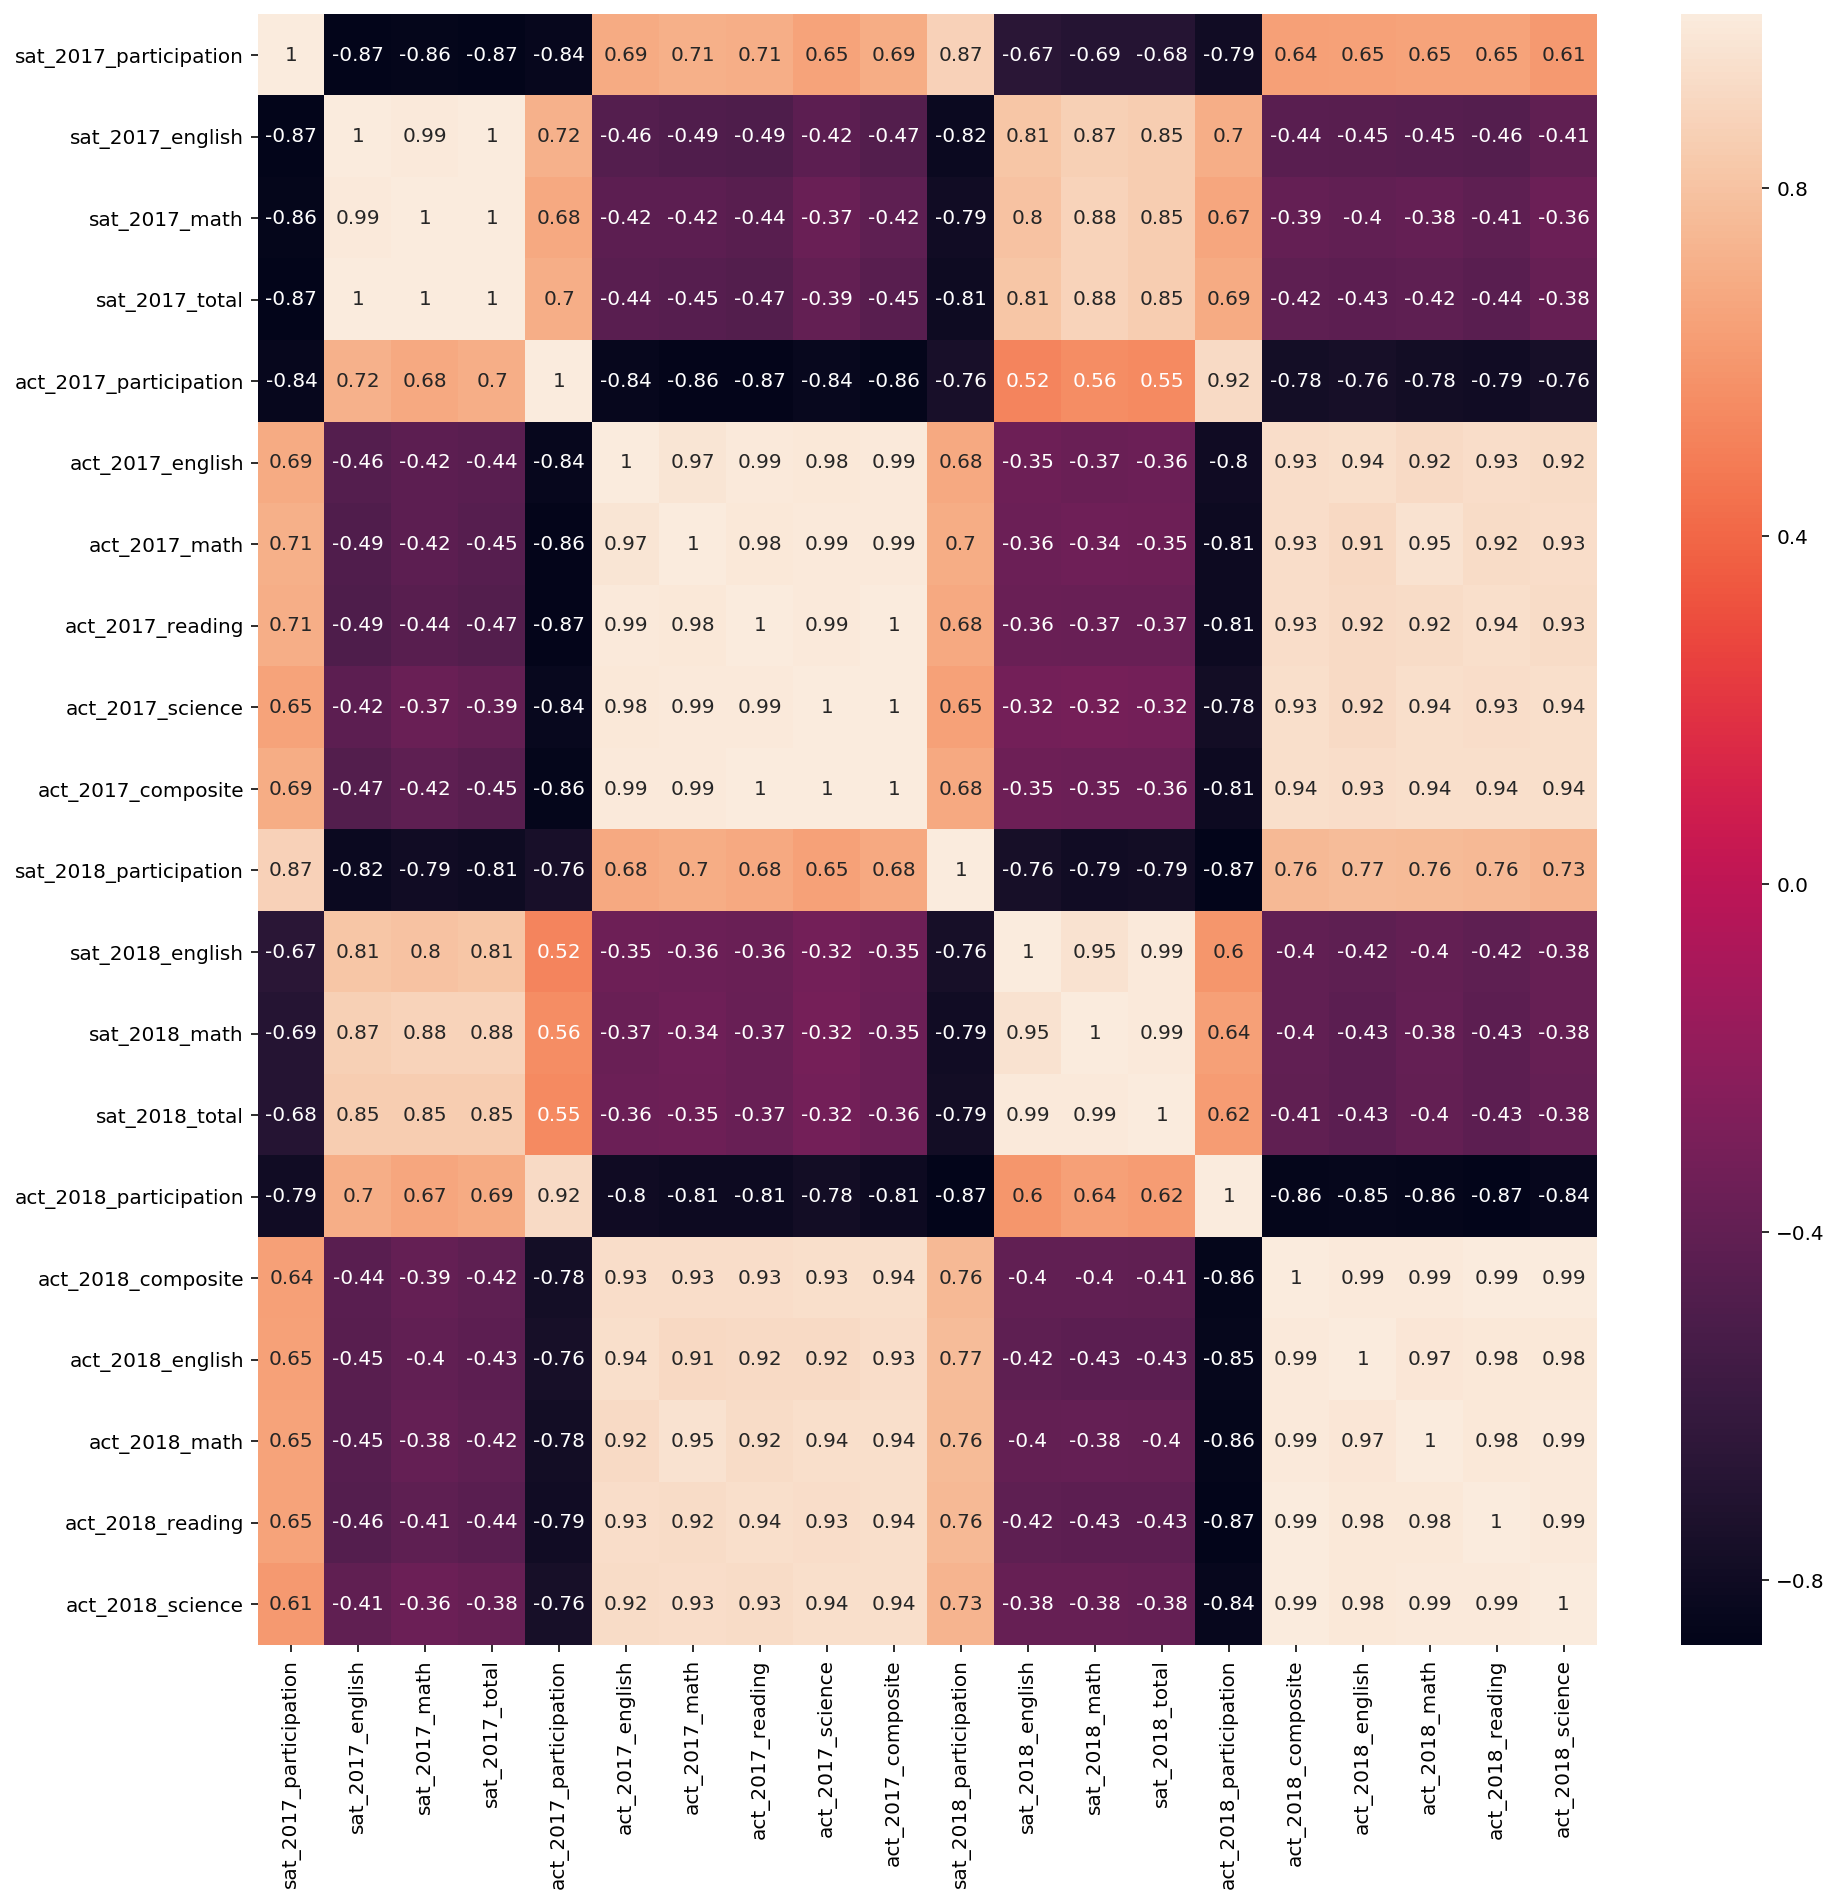

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr(), annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [67]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) #setting x-axis labels
        ax[i].set_title(list_of_titles[i]) #setting titles

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

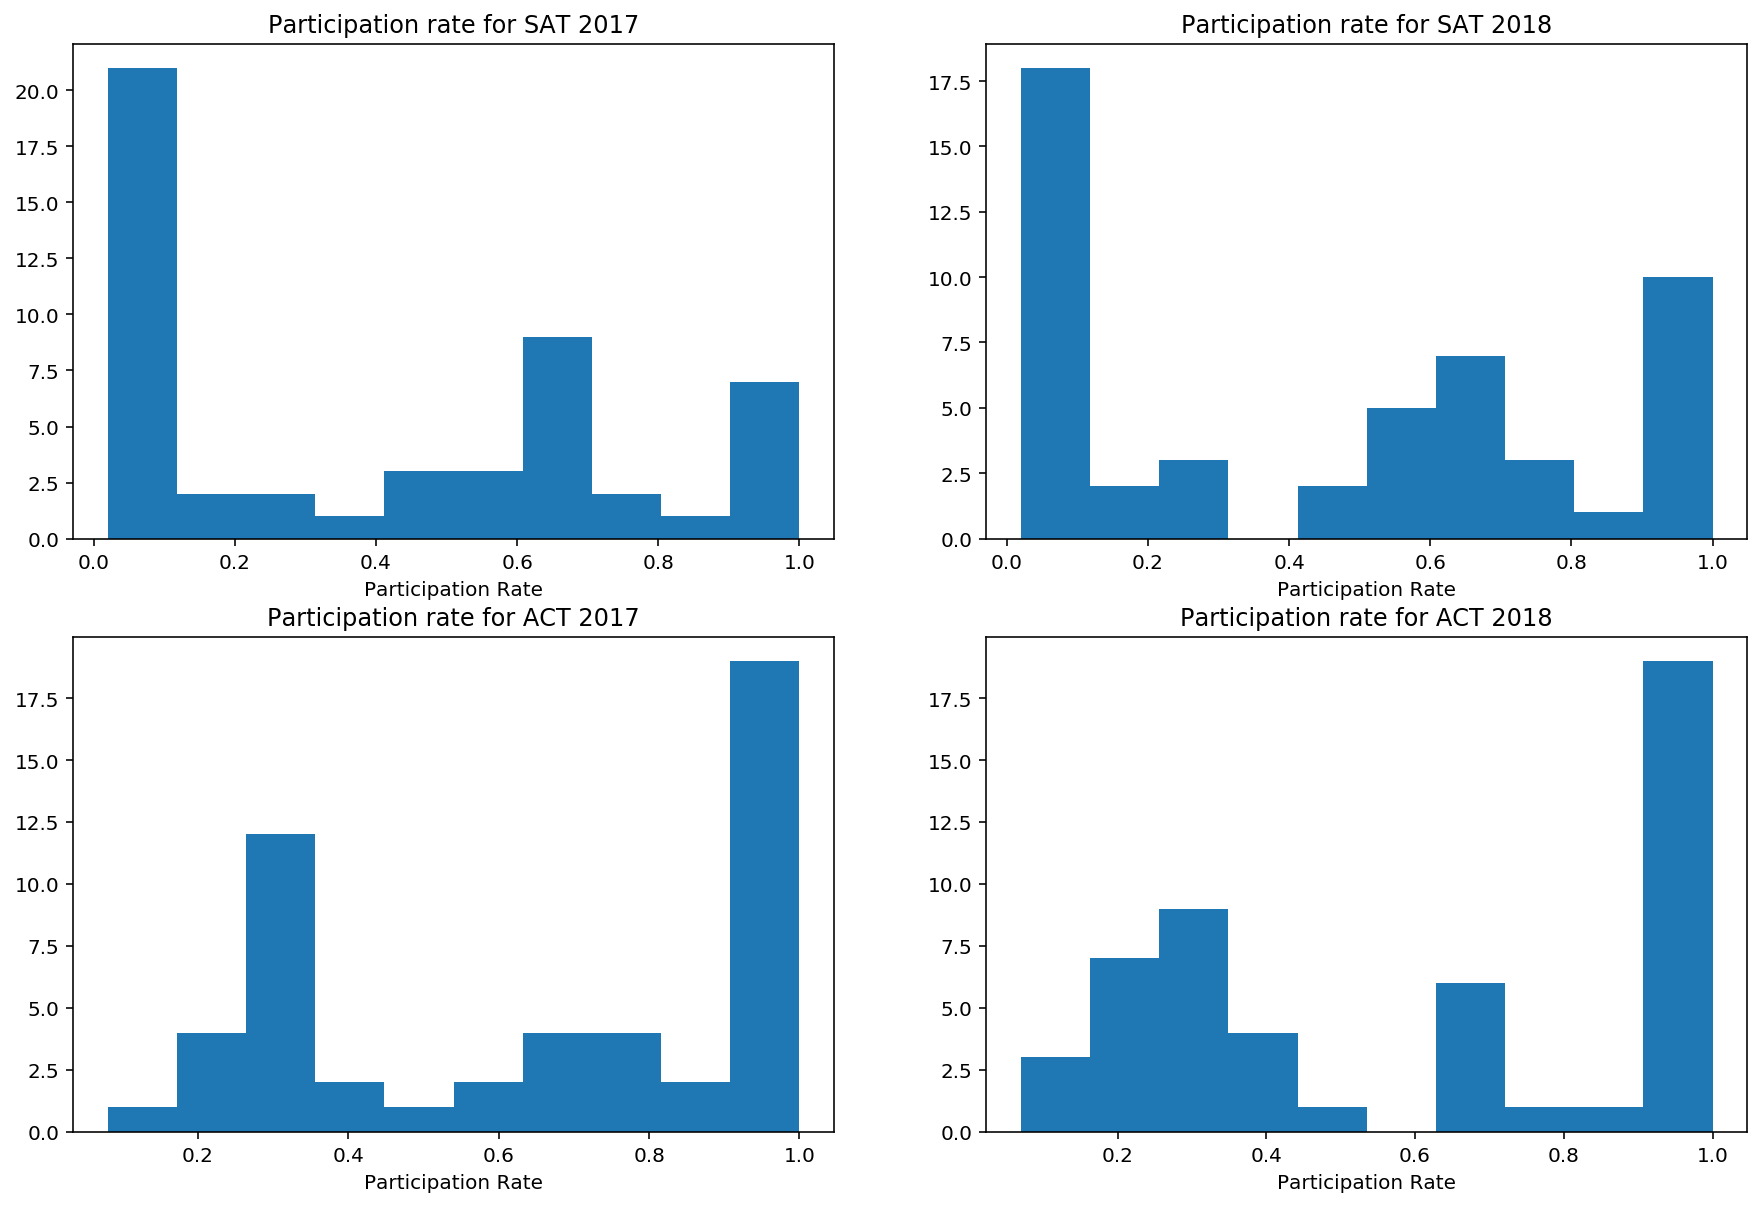

In [68]:
#using function to plot histograms for participations rates

subplot_histograms(final, ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'], 
                   ['Participation rate for SAT 2017', 'Participation rate for SAT 2018', 'Participation rate for ACT 2017', 'Participation rate for ACT 2018'], 
                   ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate'])

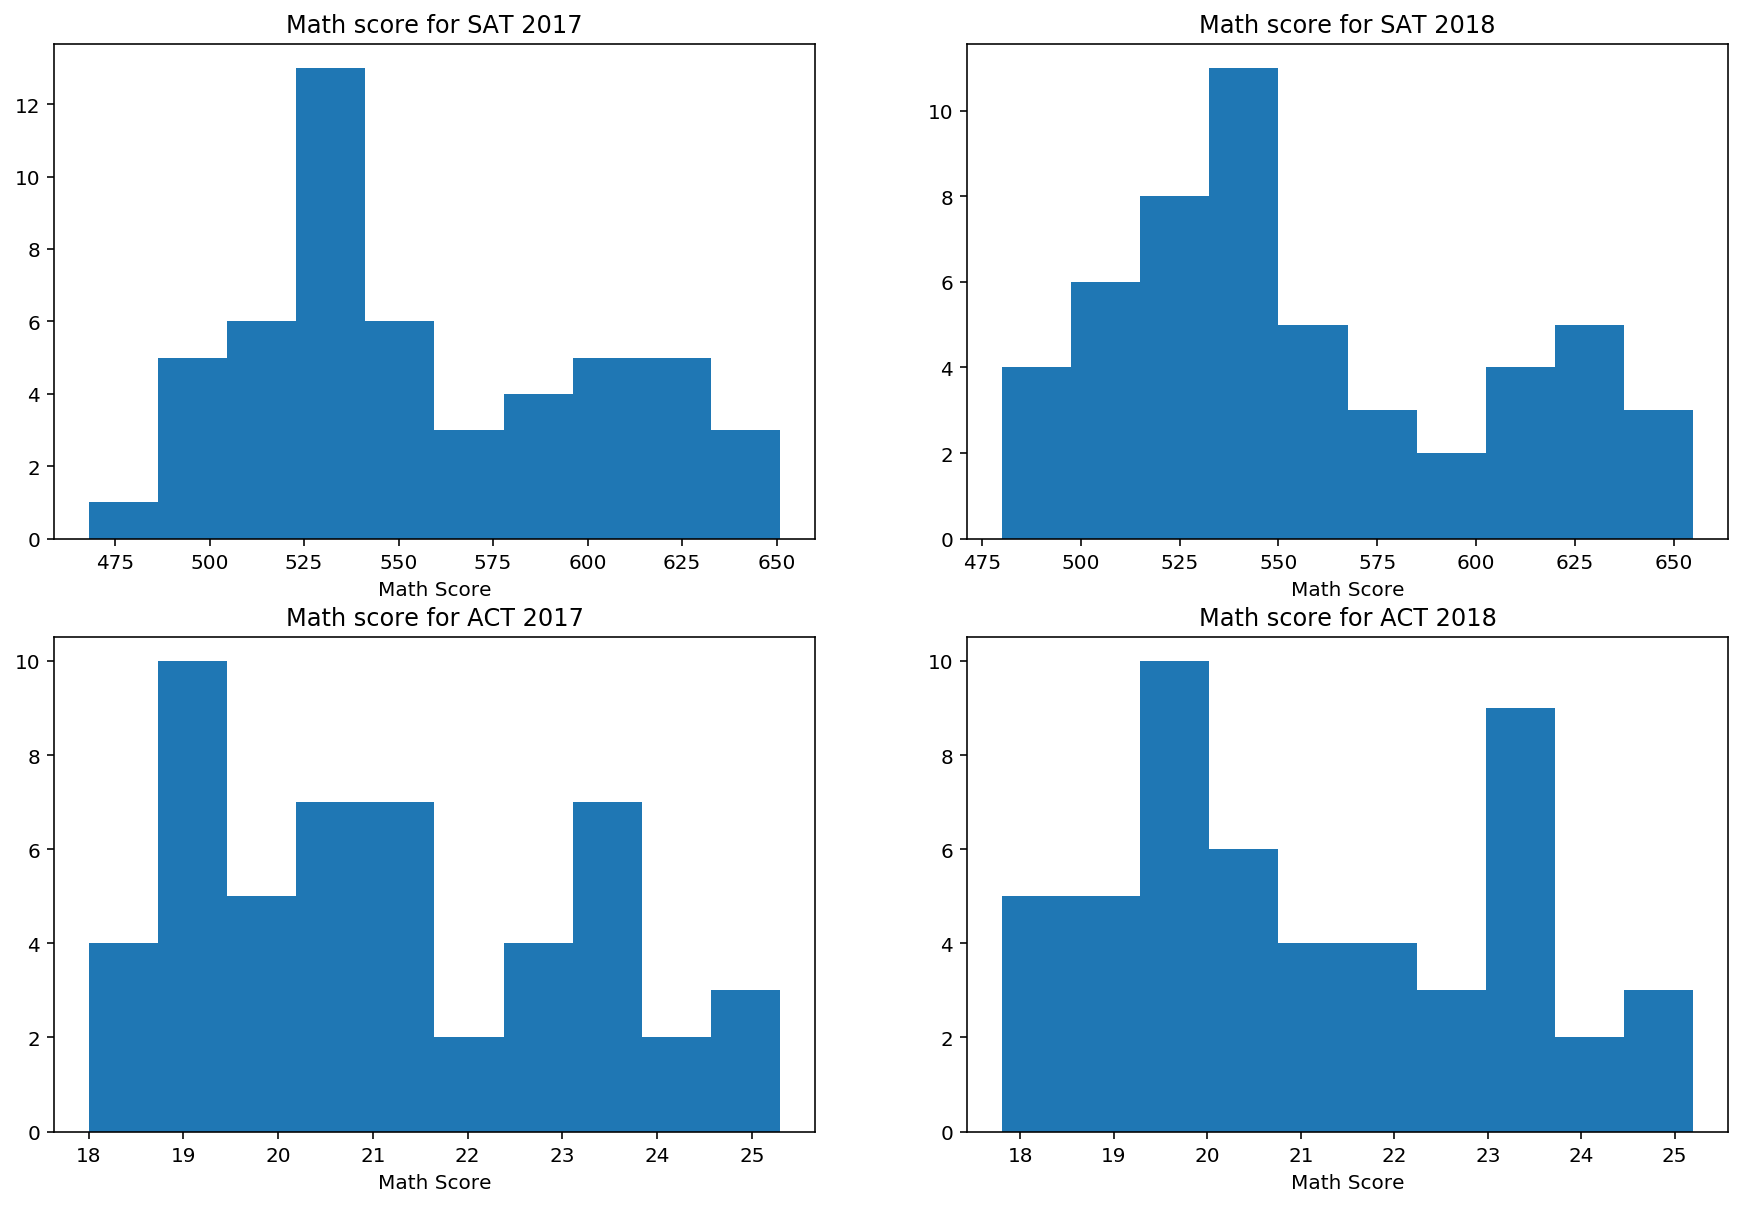

In [69]:
#using function to plot histograms for math scores

subplot_histograms(final, ['sat_2017_math', 'sat_2018_math', 'act_2017_math', 'act_2018_math'], 
                   ['Math score for SAT 2017', 'Math score for SAT 2018', 'Math score for ACT 2017', 'Math score for ACT 2018'], 
                   ['Math Score', 'Math Score', 'Math Score', 'Math Score'])

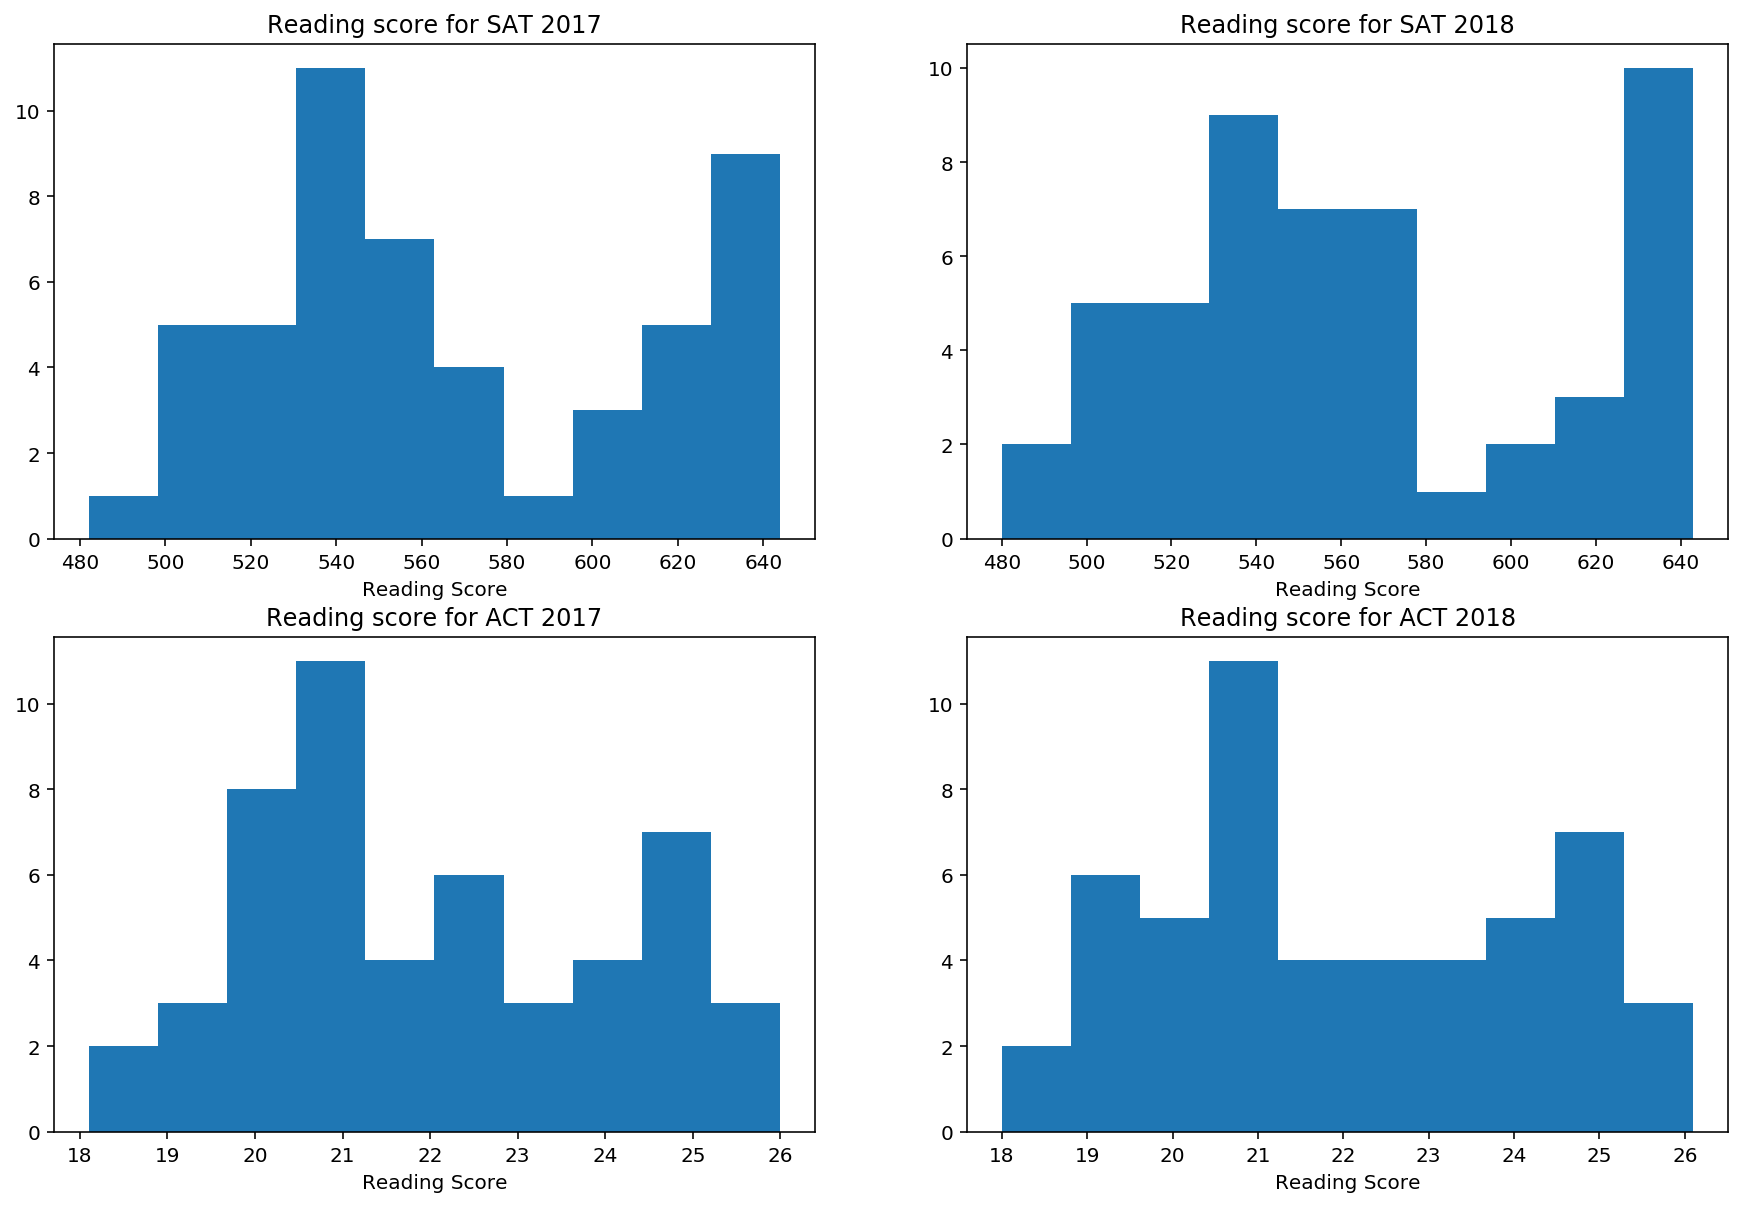

In [70]:
#using function to plot histograms for reading/verbal scores

subplot_histograms(final, ['sat_2017_english', 'sat_2018_english', 'act_2017_reading', 'act_2018_reading'], 
                   ['Reading score for SAT 2017', 'Reading score for SAT 2018', 'Reading score for ACT 2017', 'Reading score for ACT 2018'], 
                   ['Reading Score', 'Reading Score', 'Reading Score', 'Reading Score'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


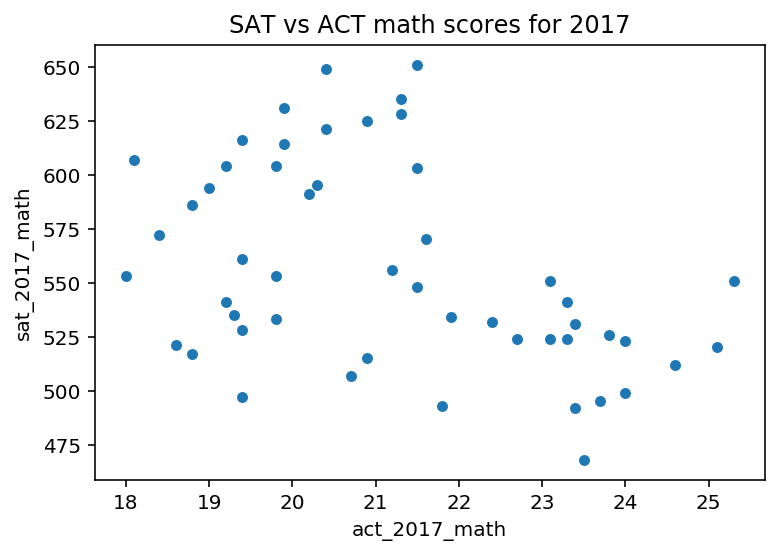

In [71]:
#SAT vs. ACT math scores for 2017

final.plot(kind='scatter', x='act_2017_math', y='sat_2017_math', 
           title='SAT vs ACT math scores for 2017');

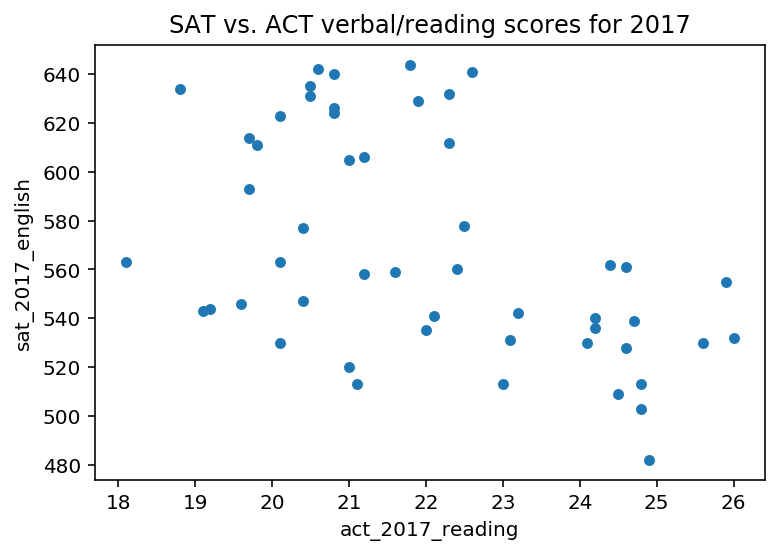

In [72]:
#SAT vs. ACT verbal/reading scores for 2017

final.plot(kind='scatter', x='act_2017_reading', y='sat_2017_english', 
           title='SAT vs. ACT verbal/reading scores for 2017');

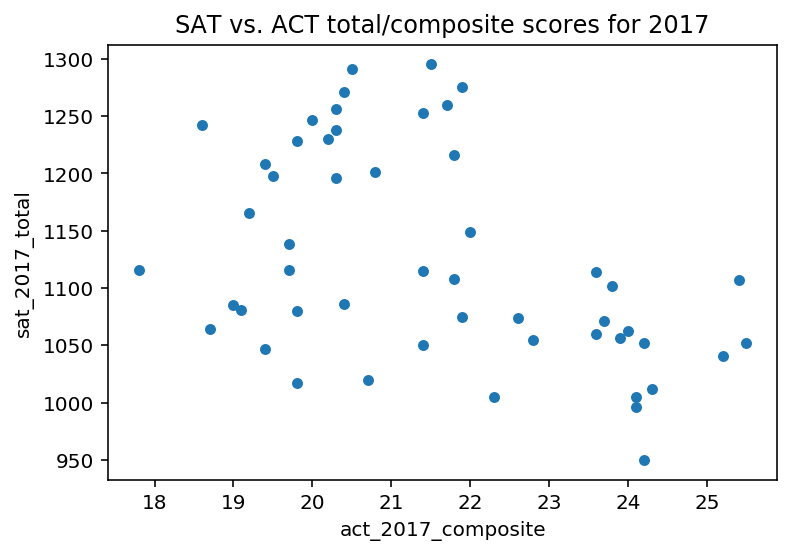

In [73]:
#SAT vs. ACT total/composite scores for 2017

final.plot(kind='scatter', x='act_2017_composite', y='sat_2017_total', 
           title='SAT vs. ACT total/composite scores for 2017');

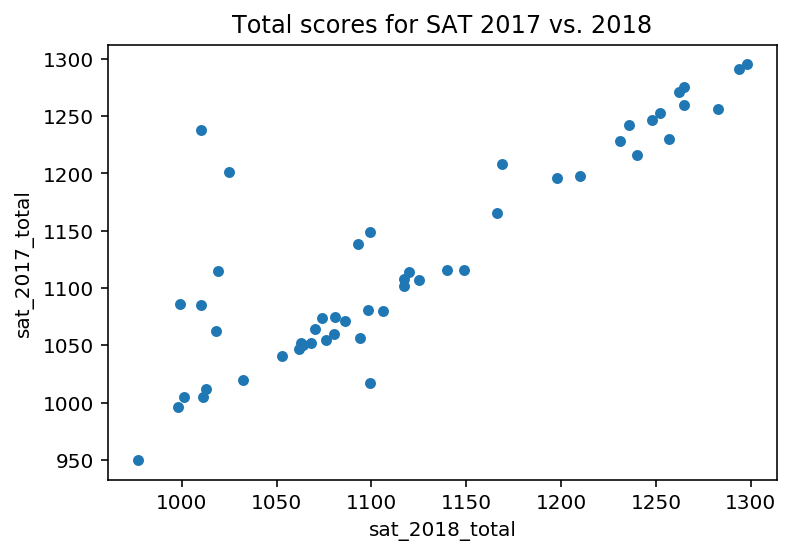

In [74]:
#Total scores for SAT 2017 vs. 2018

final.plot(kind='scatter', x='sat_2018_total', y='sat_2017_total', 
           title='Total scores for SAT 2017 vs. 2018');

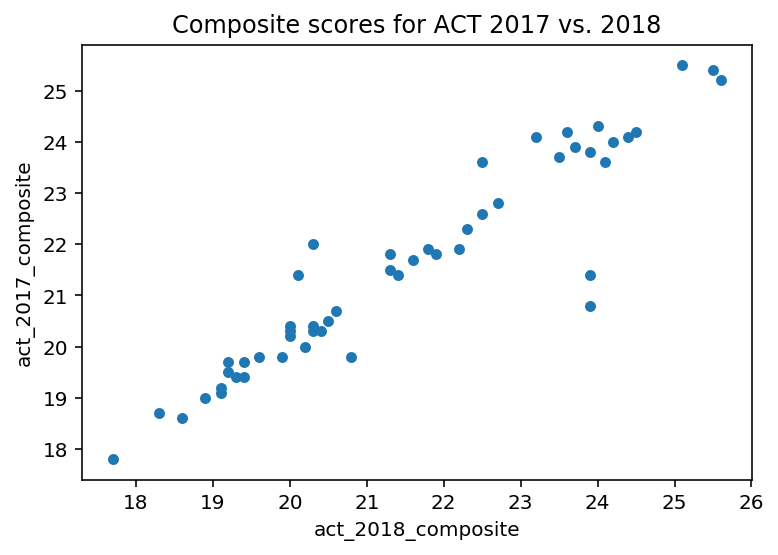

In [75]:
#Composite scores for ACT 2017 vs. 2018

final.plot(kind='scatter', x='act_2018_composite', y='act_2017_composite', 
           title='Composite scores for ACT 2017 vs. 2018');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'SAT Math and English Scores 2017 and 2018')

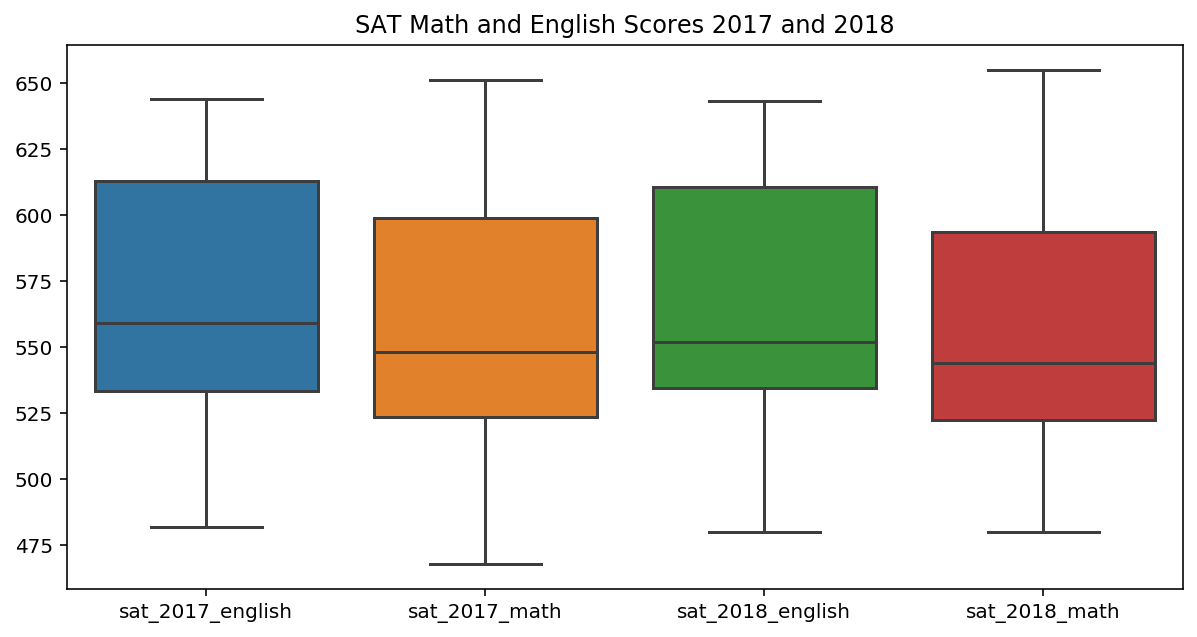

In [76]:
# SAT math and english scores 2017 and 2018

sat_scores = pd.DataFrame(final[['sat_2017_english','sat_2017_math', 'sat_2018_english','sat_2018_math']])
plt.figure(figsize=(10,5))

sns.boxplot(orient='v', data = sat_scores);
plt.title('SAT Math and English Scores 2017 and 2018')

Text(0.5, 1.0, 'SAT Total Scores 2017 and 2018')

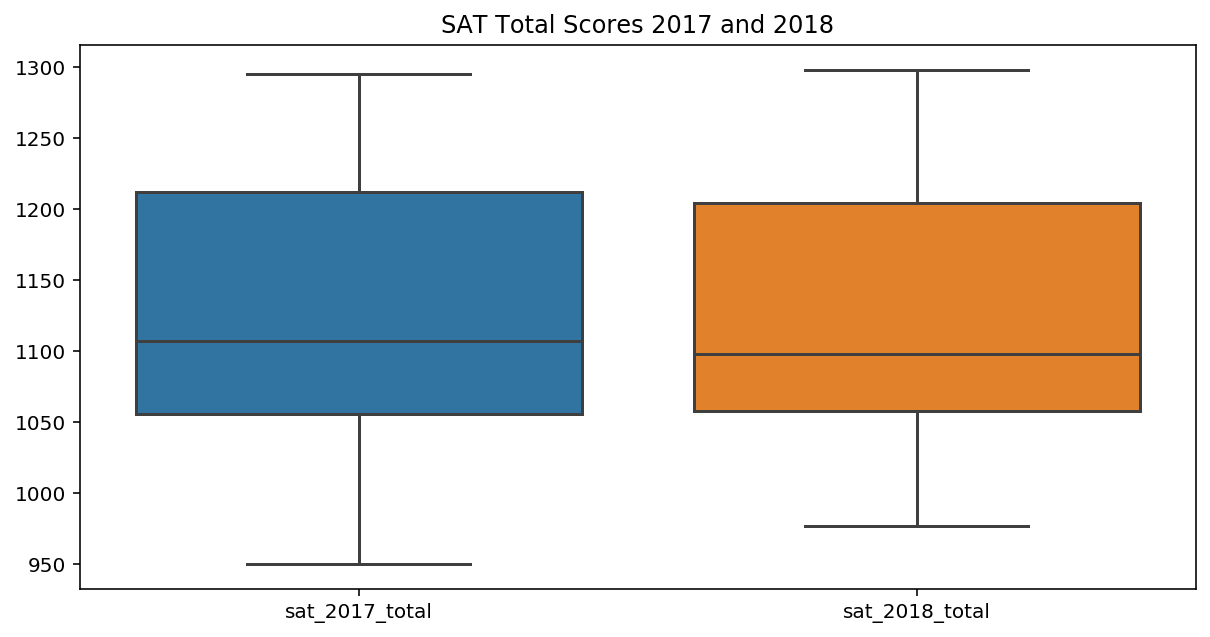

In [77]:
# SAT total scores 2017 and 2018

sat_total_scores = pd.DataFrame(final[['sat_2017_total','sat_2018_total']])
plt.figure(figsize=(10,5))

sns.boxplot(orient='v', data = sat_total_scores);
plt.title('SAT Total Scores 2017 and 2018')

Text(0.5, 1.0, 'SAT and ACT Participation Rates 2017 and 2018')

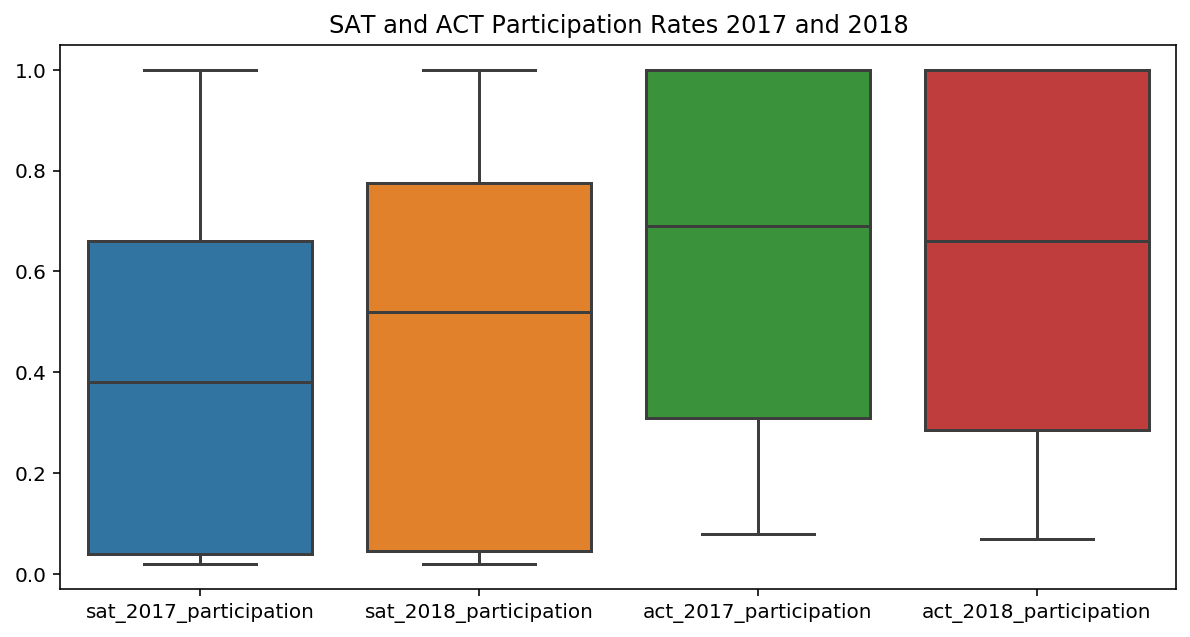

In [78]:
#SAT and ACT participation 2017 and 2018

part_rates = pd.DataFrame(final[['sat_2017_participation','sat_2018_participation', 'act_2017_participation', 'act_2018_participation']])
plt.figure(figsize=(10,5))

sns.boxplot(orient='v', data = part_rates);
plt.title('SAT and ACT Participation Rates 2017 and 2018')

Text(0.5, 1.0, 'ACT Scores 2017')

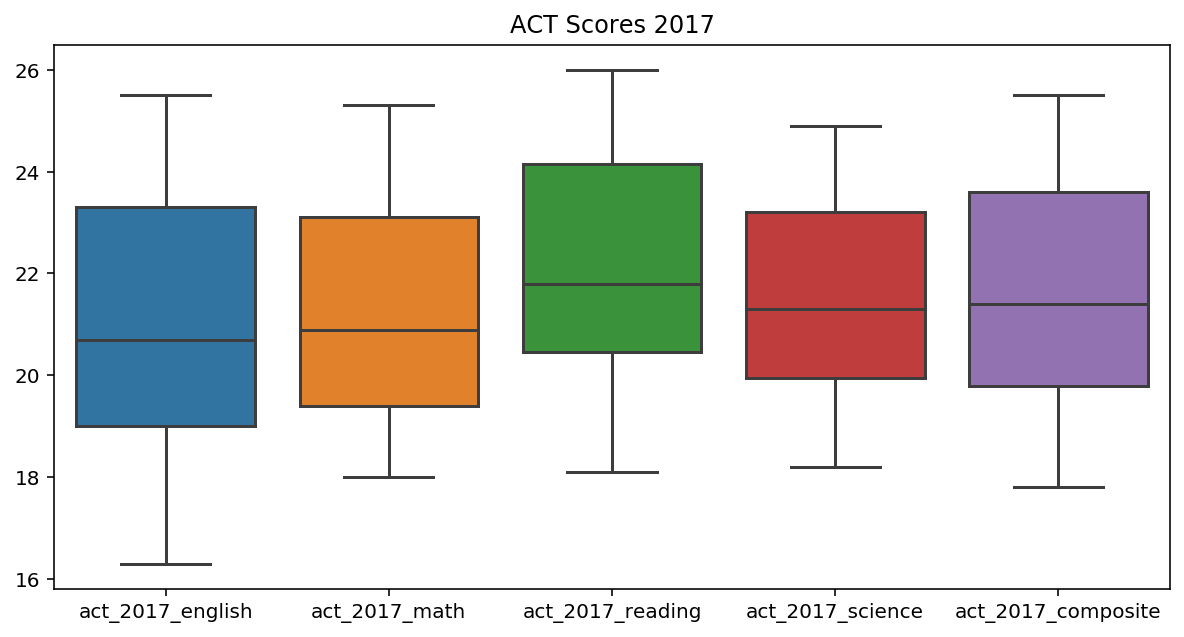

In [79]:
# ACT Scores 2017
act_2017_scores = pd.DataFrame(final[['act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']])
plt.figure(figsize=(10,5))

sns.boxplot(orient='v', data = act_2017_scores);
plt.title('ACT Scores 2017')

Text(0.5, 1.0, 'ACT Scores 2018')

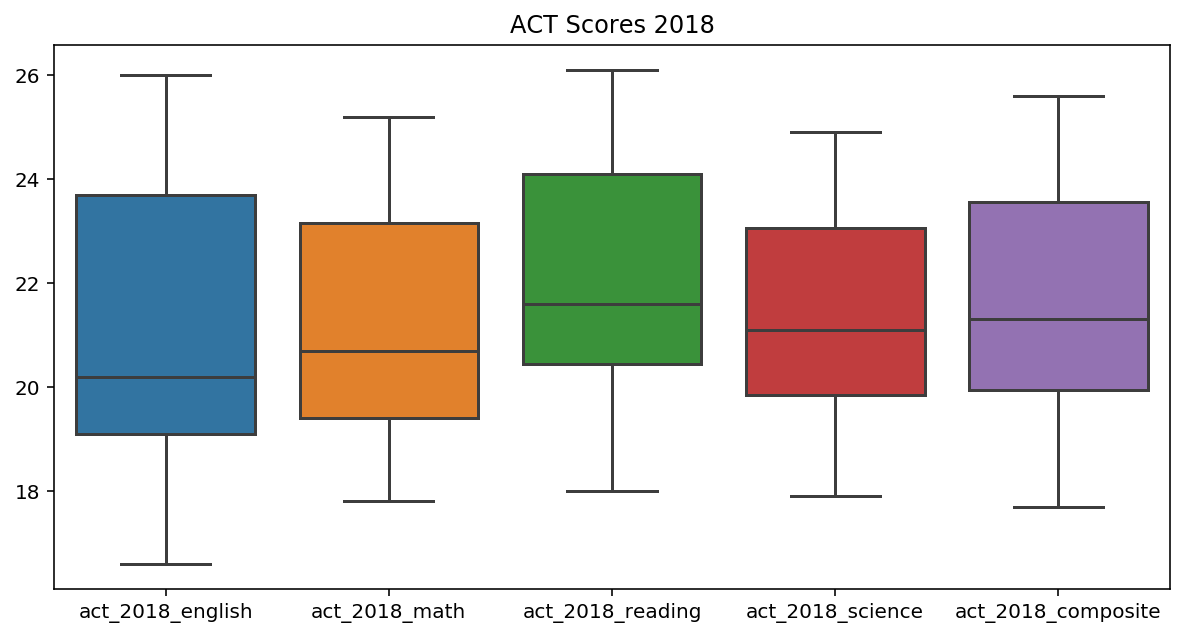

In [80]:
# ACT Scores 2018
act_2018_scores = pd.DataFrame(final[['act_2018_english','act_2018_math','act_2018_reading','act_2018_science','act_2018_composite']])
plt.figure(figsize=(10,5))

sns.boxplot(orient='v', data = act_2018_scores);
plt.title('ACT Scores 2018')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

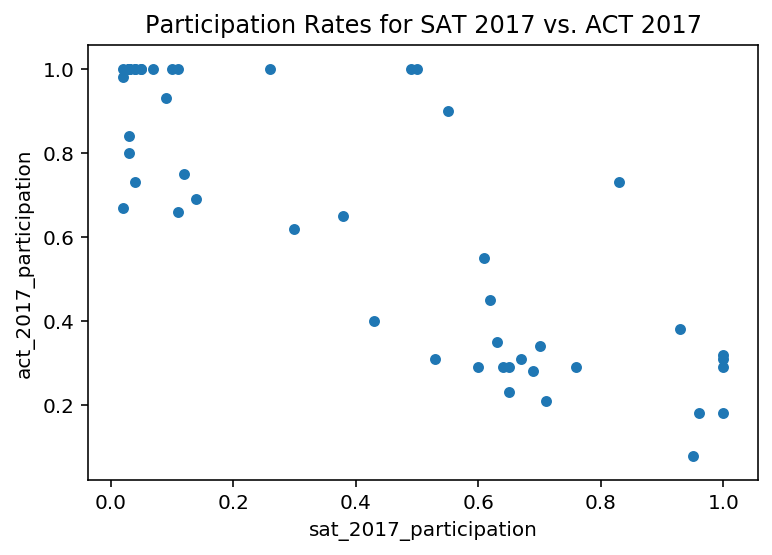

In [81]:
#relationship between SAT 2017 and ACT 2017 participation rate

final.plot(kind='scatter', x='sat_2017_participation', y='act_2017_participation', 
           title='Participation Rates for SAT 2017 vs. ACT 2017');

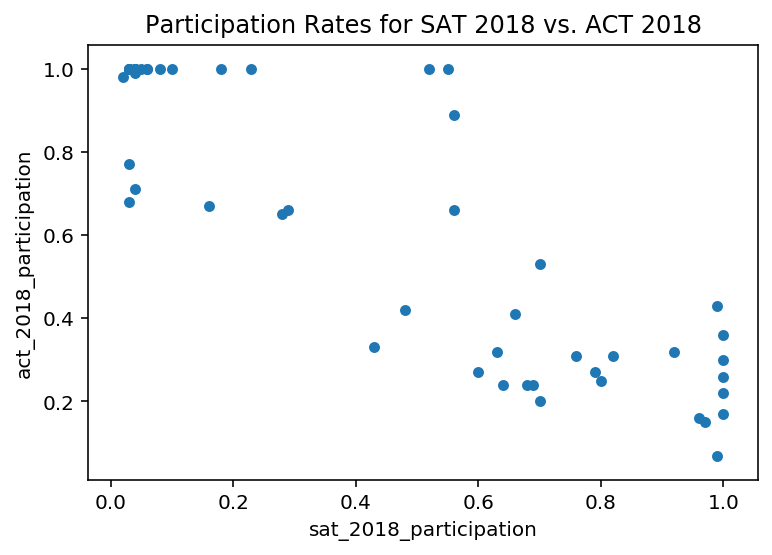

In [82]:
#relationship between SAT 2018 and ACT 2018 participation rate

final.plot(kind='scatter', x='sat_2018_participation', y='act_2018_participation', 
           title='Participation Rates for SAT 2018 vs. ACT 2018');

The above two scatterplots show the negative correlation between SAT and ACT participation rates within each year, which confirms that,typically, students only take one of the two college admission tests. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [83]:
final.describe()

,sat_2017_participation,sat_2017_english,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_english,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


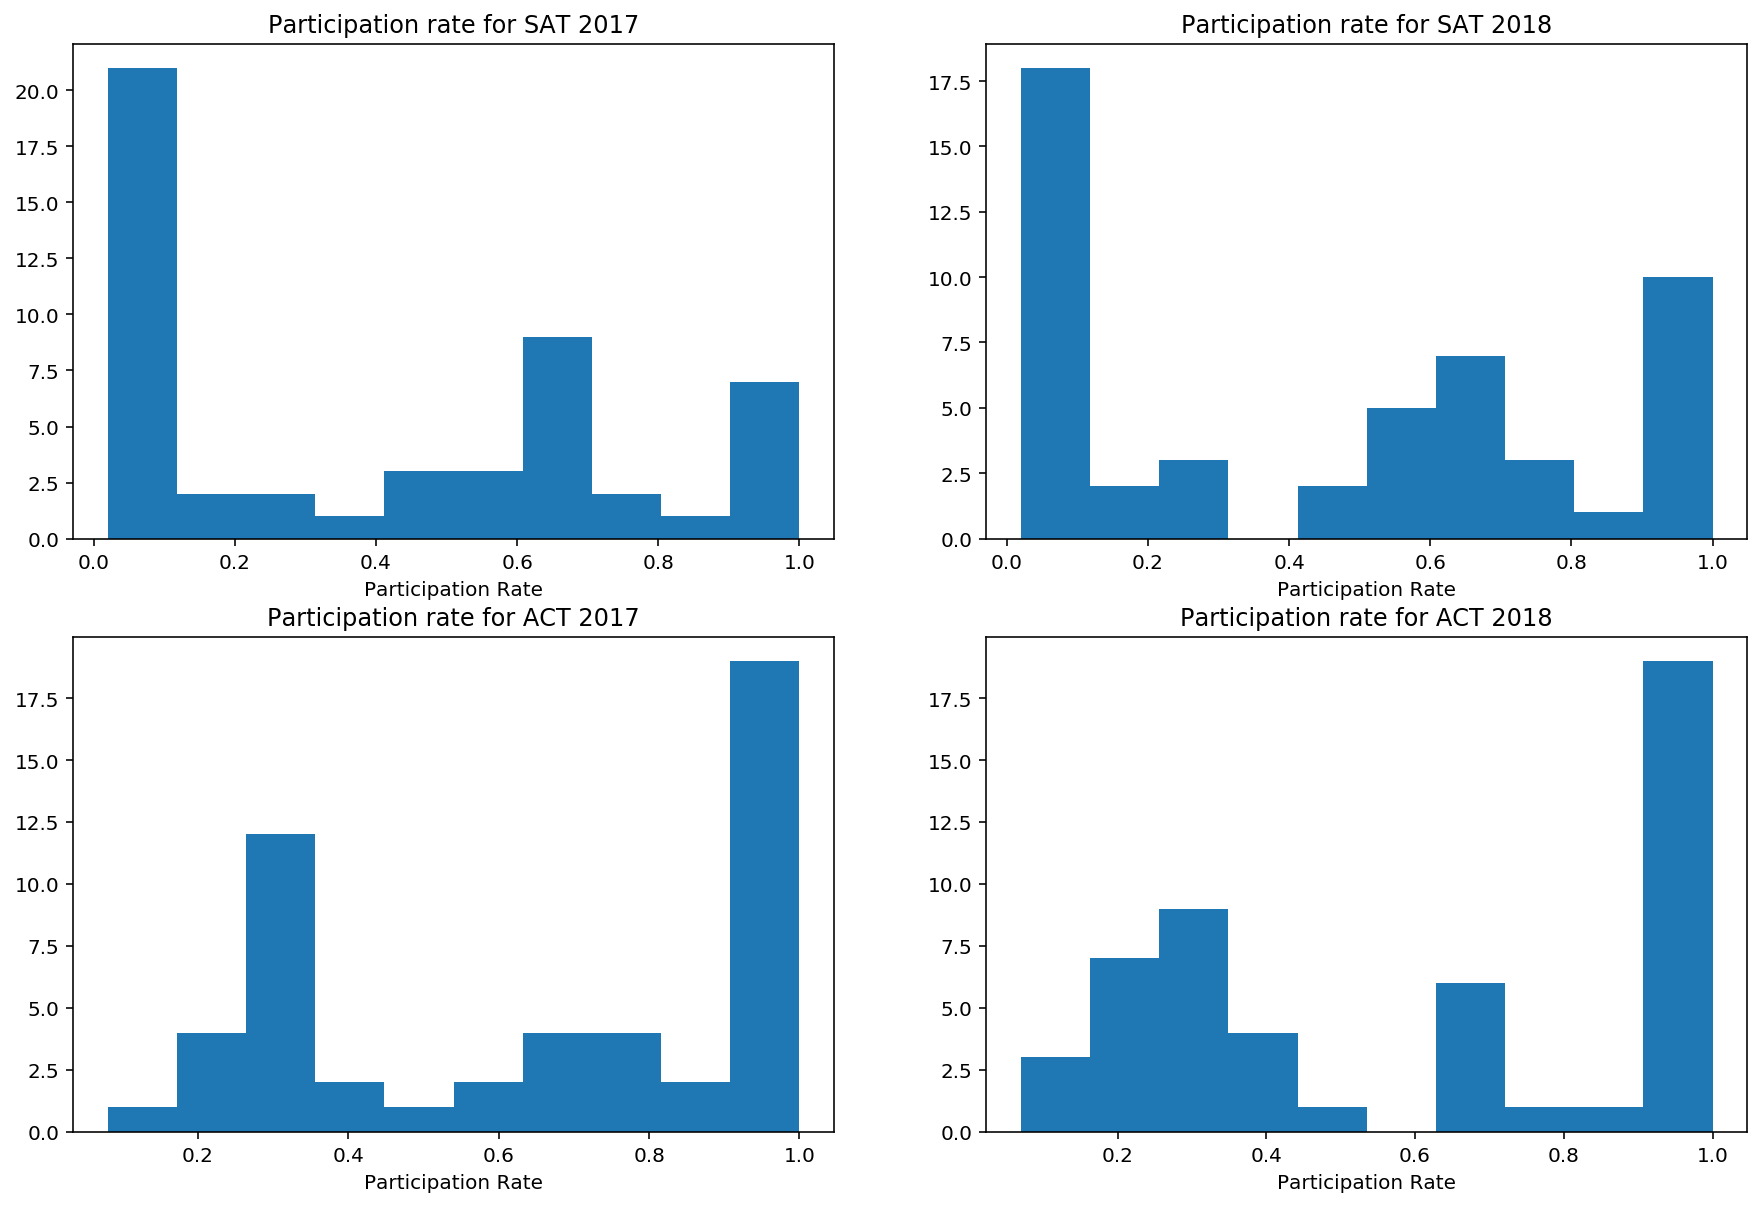

In [84]:
subplot_histograms(final, ['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation'], 
                   ['Participation rate for SAT 2017', 'Participation rate for SAT 2018', 'Participation rate for ACT 2017', 'Participation rate for ACT 2018'], 
                   ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate'])

Participation rate for SAT 2017 and 2018:
- right skew, mean is more than median, bimodal distribution

Participation rate for ACT 2017 and 2018:
- left skew, mean is less than median, bimodal distribution

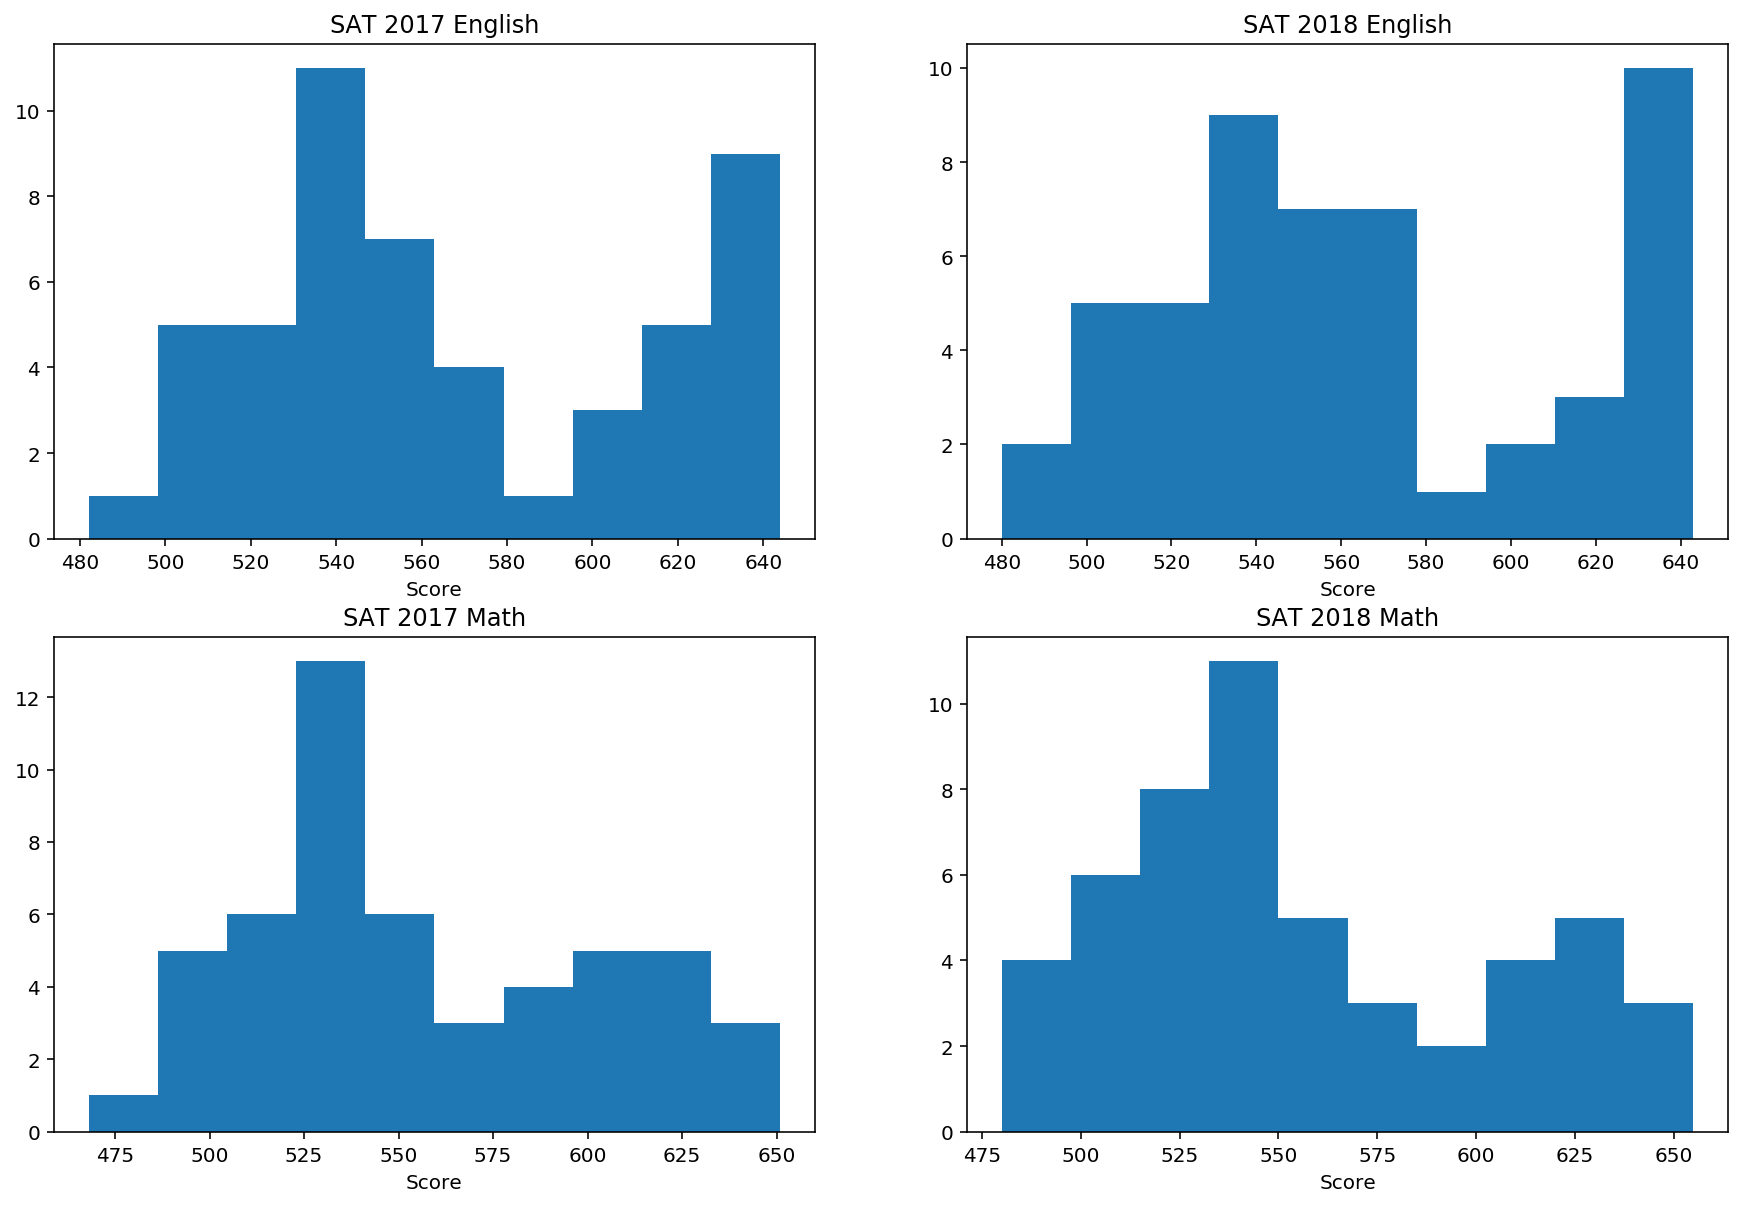

In [85]:
subplot_histograms(final, ['sat_2017_english', 'sat_2018_english', 'sat_2017_math', 'sat_2018_math'], 
                   ['SAT 2017 English', 'SAT 2018 English', 'SAT 2017 Math', 'SAT 2018 Math'], 
                   ['Score', 'Score', 'Score', 'Score'])

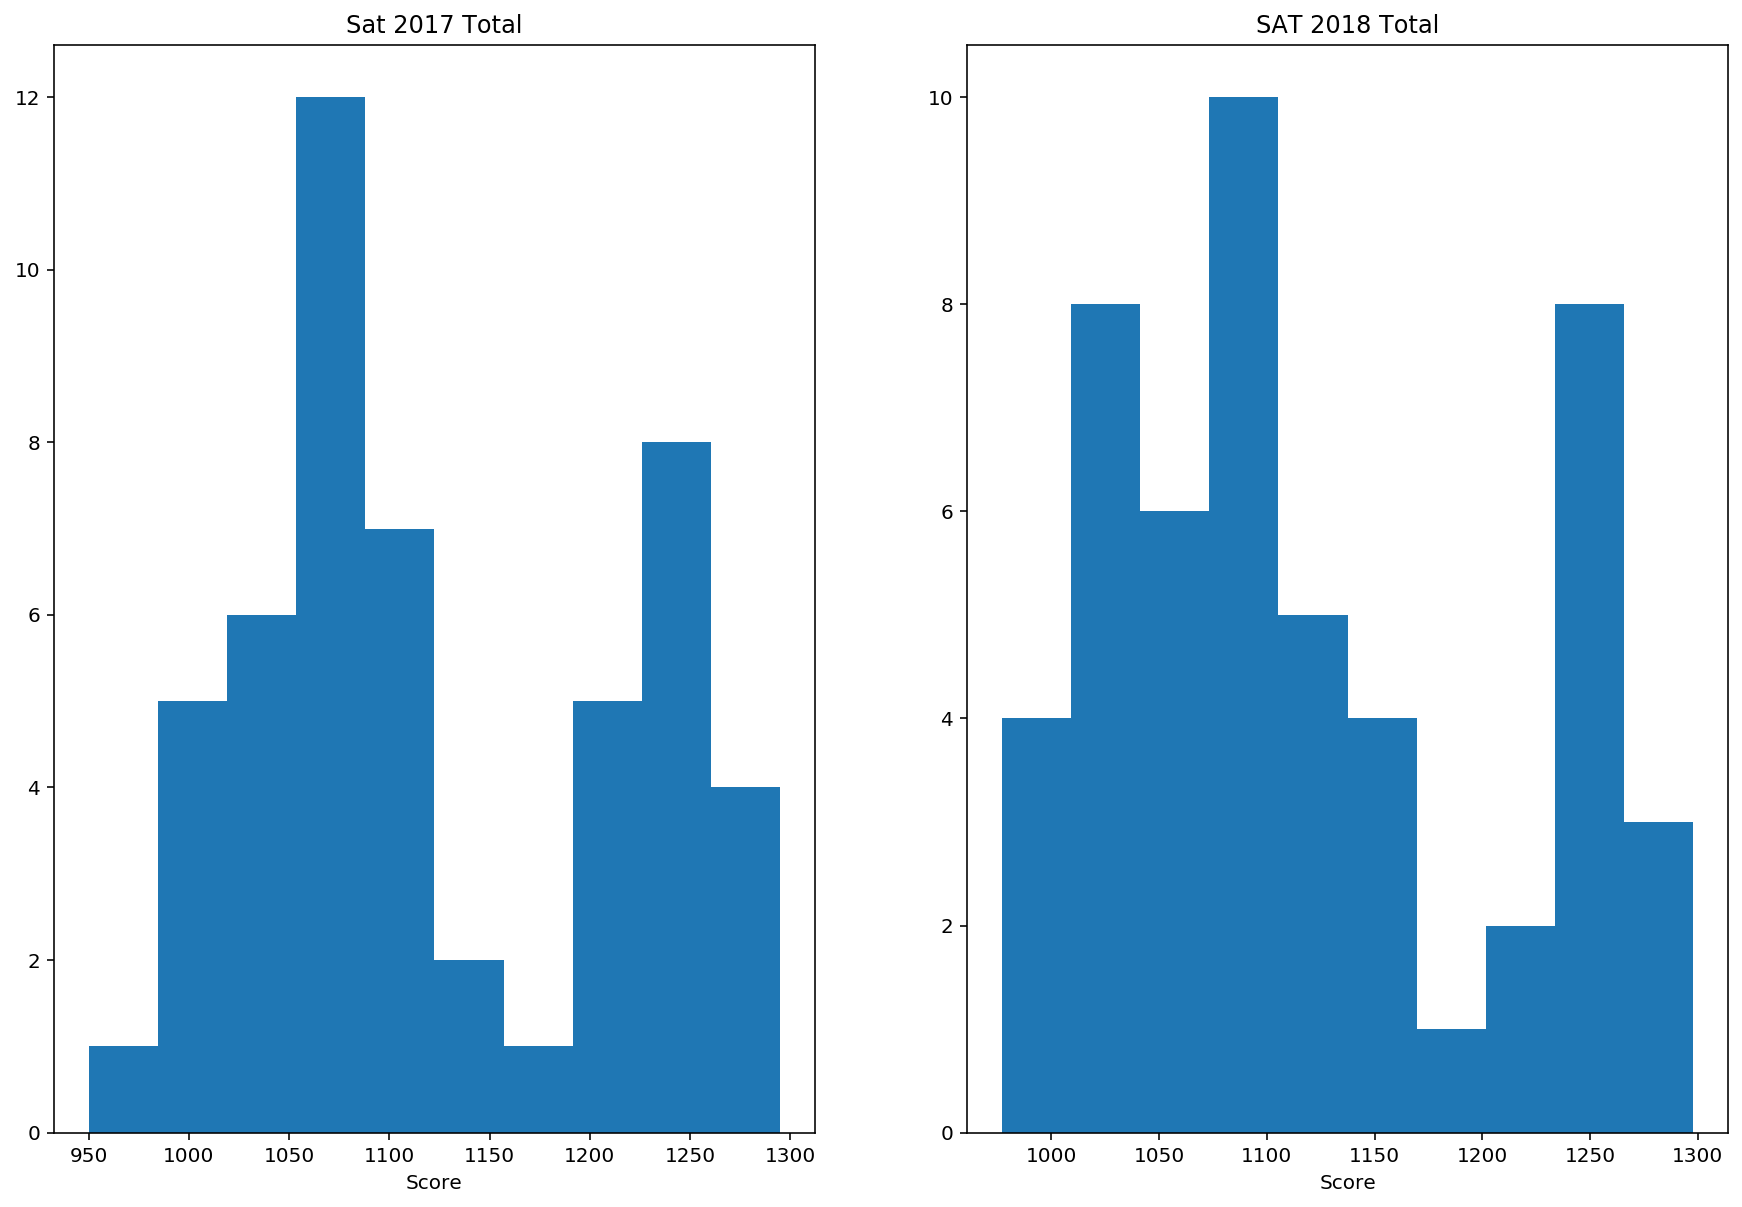

In [86]:
subplot_histograms(final, ['sat_2017_total', 'sat_2018_total'], 
                   ['Sat 2017 Total', 'SAT 2018 Total'], 
                   ['Score', 'Score'])

Math, english and total scores for SAT 2017 and 2018:
- bimodal distributions, mean and median are close to each other

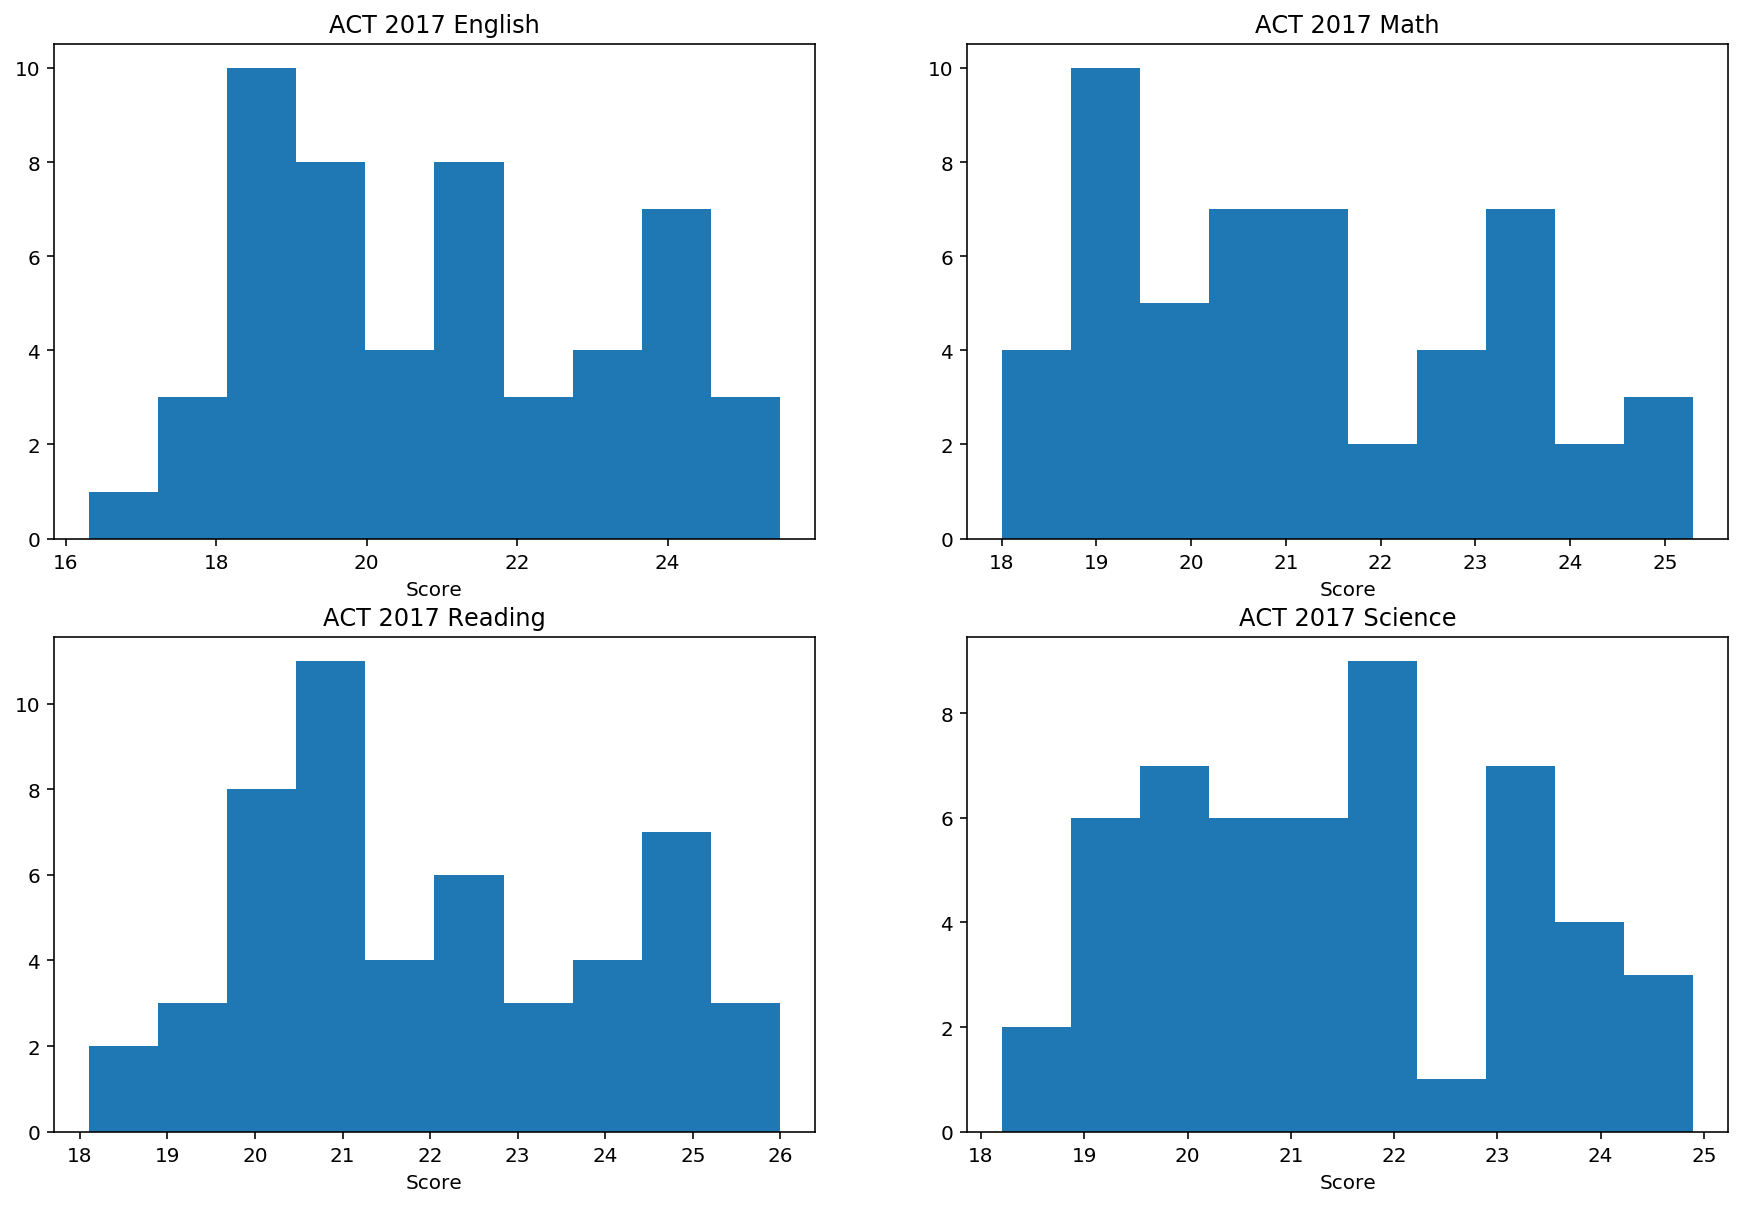

In [87]:
subplot_histograms(final, ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science'], 
                   ['ACT 2017 English', 'ACT 2017 Math', 'ACT 2017 Reading', 'ACT 2017 Science'], 
                   ['Score', 'Score', 'Score', 'Score'])

English, Math, Reading, Science and Composite Scores for ACT 2017, and Composite Score for ACT 2018:
- bimodal distributions, mean and median are close to each other 

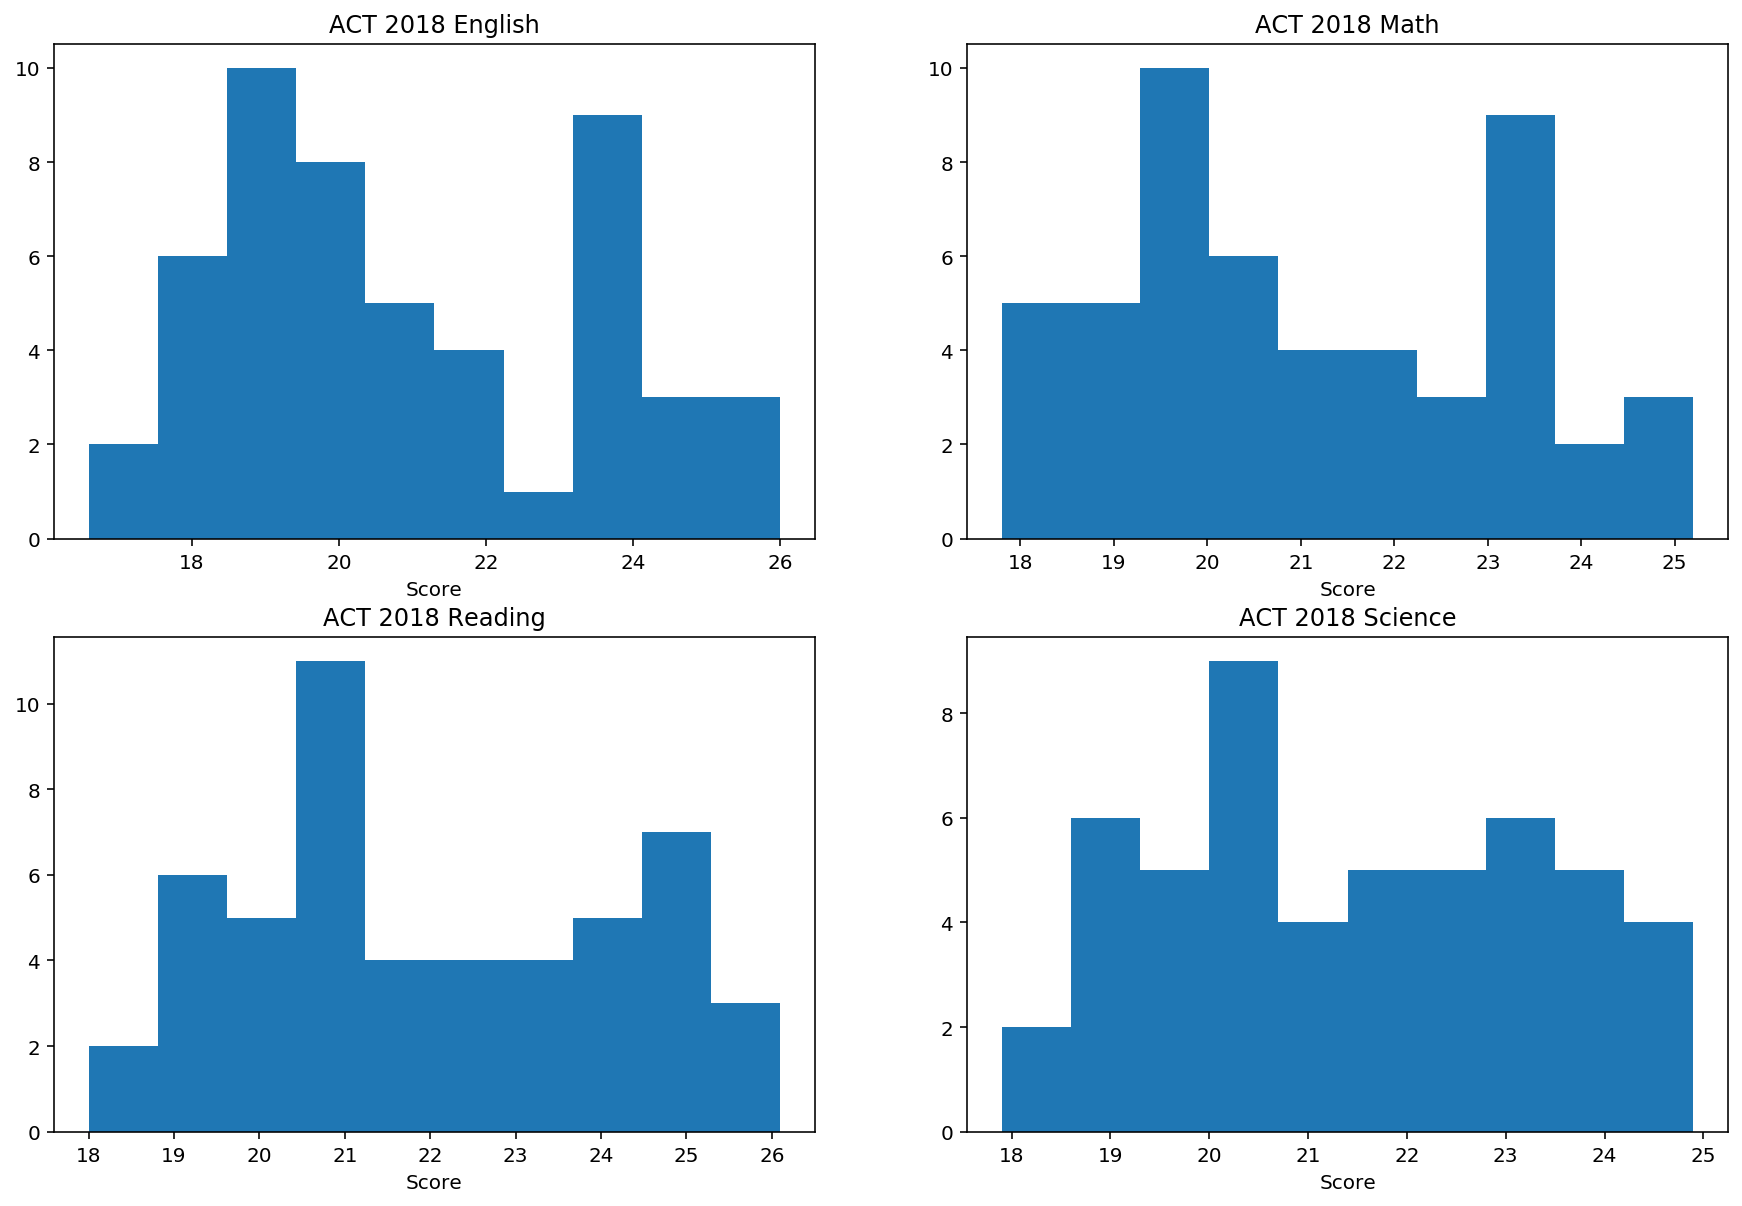

In [88]:
subplot_histograms(final, ['act_2018_english', 'act_2018_math', 'act_2018_reading', 'act_2018_science'], 
                   ['ACT 2018 English', 'ACT 2018 Math', 'ACT 2018 Reading', 'ACT 2018 Science'], 
                   ['Score', 'Score', 'Score', 'Score'])

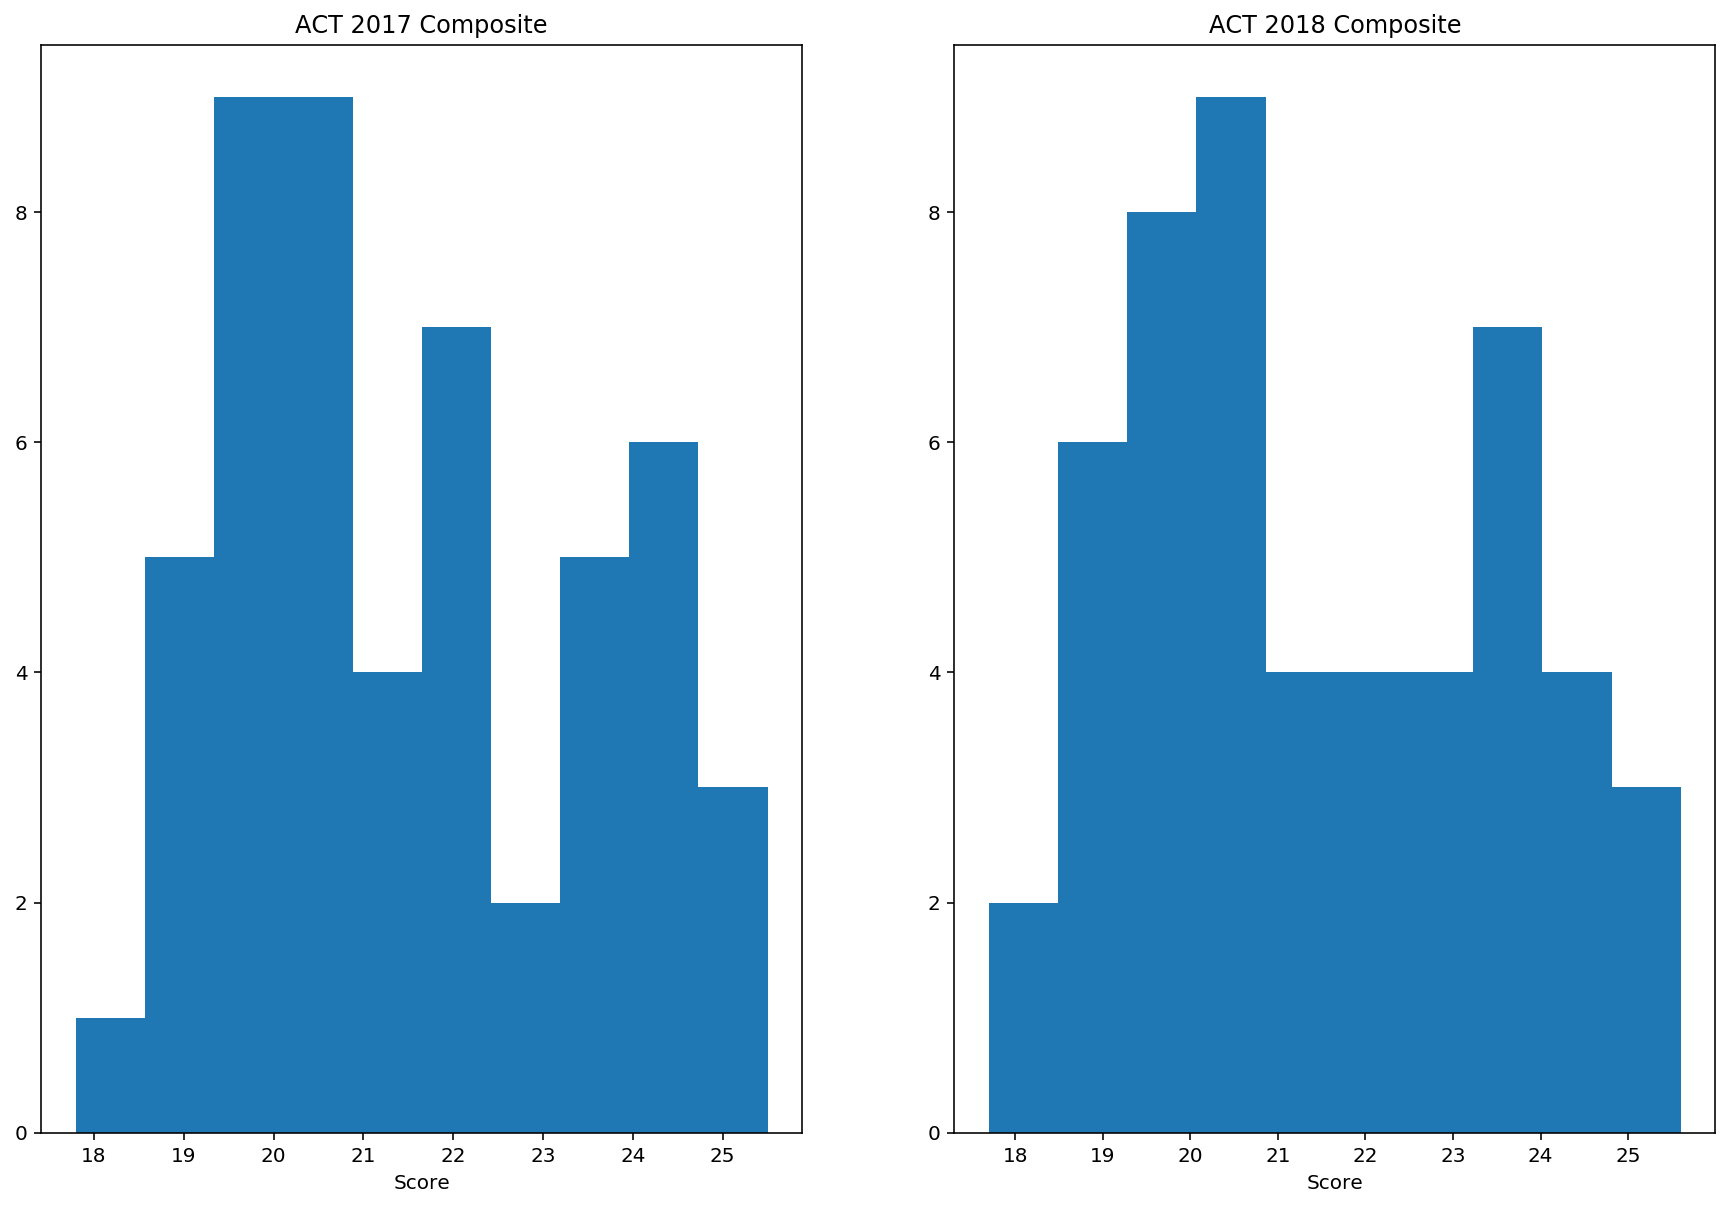

In [89]:
subplot_histograms(final, ['act_2017_composite', 'act_2018_composite'], 
                   ['ACT 2017 Composite', 'ACT 2018 Composite'], 
                   ['Score', 'Score'])

English, Math, Reading, and Science Scores for ACT 2018:
- bimodal distributions, mean and median are close to each other 


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [90]:
#running each variable through the Shapiro-Wilk test

def shapiro_all(list):
    x = {i: shapiro(final[i]) for i in list}
    return x

shapiro_all(['sat_2017_participation', 'sat_2018_participation', 'act_2017_participation', 'act_2018_participation',
            'sat_2017_english', 'sat_2018_english', 'sat_2017_math', 'sat_2018_math', 'sat_2017_total', 'sat_2018_total',
            'act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science', 'act_2017_composite', 'act_2018_composite',
            'act_2018_english', 'act_2018_math', 'act_2018_reading', 'act_2018_science'])

{'sat_2017_participation': (0.8536624908447266, 1.6491485439473763e-05),
 'sat_2018_participation': (0.8562899827957153, 1.9515344320097938e-05),
 'act_2017_participation': (0.8398400545120239, 6.9784323386556935e-06),
 'act_2018_participation': (0.8256993889808655, 3.0170992886269232e-06),
 'sat_2017_english': (0.920563280582428, 0.0022041318006813526),
 'sat_2018_english': (0.927172839641571, 0.003885231912136078),
 'sat_2017_math': (0.9493668675422668, 0.029660698026418686),
 'sat_2018_math': (0.9374470114707947, 0.009714742191135883),
 'sat_2017_total': (0.9359506964683533, 0.008478053845465183),
 'sat_2018_total': (0.9208988547325134, 0.002267528558149934),
 'act_2017_english': (0.9486985802650452, 0.02782275155186653),
 'act_2017_math': (0.9527901411056519, 0.041251927614212036),
 'act_2017_reading': (0.9556081295013428, 0.05425470694899559),
 'act_2017_science': (0.9631470441818237, 0.11361195892095566),
 'act_2017_composite': (0.9499148726463318, 0.03126131370663643),
 'act_201

Answer: From the histograms above, visually, we do not observe normal distributions. Based on the Shapiro-Wilk test, except for act_2017_reading, act_2017_science, and act_2018_science, which have p values above 0.05, all other variables do not have normal distributions. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: As explained above, we do not observe normal distributions for math, reading, and participation rates, except for act_2017_reading scores (which has a p value above 0.05 based on Shapiro-Wilk test). If the distribution is not normal, then it cannot be used to draw inferences regarding the entire population. Any statistical calculations to derive confidence intervals require the underlying distribution to be a normal distribution. Without a normal distribution, we are unable to draw a valid conclusion by hypothesis testing.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

Answer: 

The data does not go into details of the student type e.g. economic profile, school district etc. which might be able to help us draw more accurate and specific statistical inferences.

In addition, some states have smaller populations, so a similar change in number of participants would affect its participation rate to a larger extent, when compared against states with larger populations. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. SAT and ACT are graded on different scales, rubrics, and content. The length and format of each test are also different. This means that it is not an equal comparison to directly compare the specific SAT and ACT math scores. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [91]:
t_stat, p_val = stats.ttest_ind(final.sat_2017_total, final.sat_2018_total, equal_var=False)
print(t_stat, p_val)

0.32888697491988567 0.7429291116643162


The p value is more than 0.05 which means there is weak evidence against the null hypothesis. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Colorado**: from 2017 to 2018, Colorado's SAT participation rate increased from 11% to 100%. This was matched by a fall in its ACT participation rate from 100% to 30%. Upon further research, this can be explained by Colorado amending its policy to mandate that all high school juniors take the SAT - "Colorado and the College Board partnered to administer the SAT as the state’s accountability exam and every junior will now take a new four hour exam." (source: Testive)

Another interesting trend that accompanies this change in policy is the change in total/composite score. For the SAT, Colorado's total score dropped from 1201 to 1025, from above average to below average in their respective years. The reverse can be seen for the ACT - Colorado's ACT composite score increased from 20.8 to 23.9, from below average to above average in their respective years. One possible explanation for this is that only the most motivated students will decide to take the non-mandated exam, and this leads to higher total/composite scores for the non-mandated exam. 

Source: Wheeler, Daniel, et al. “Colorado Changed to the SAT in 2017: What You Need to Know.” Testive, 10 July 2018, www.testive.com/colorado-sat-change-2017/.
  

In [92]:
#displaying average total/composite scores for SAT and ACT 2017 and 2018

pd.DataFrame(final[['state', 'sat_2017_participation', 'sat_2017_total', 'sat_2018_participation', 'sat_2018_total', 'act_2017_participation', 'act_2017_composite', 'act_2018_participation', 'act_2018_composite']]).describe()

,sat_2017_participation,sat_2017_total,sat_2018_participation,sat_2018_total,act_2017_participation,act_2017_composite,act_2018_participation,act_2018_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,1126.098039,0.457451,1120.019608,0.652549,21.519608,0.616471,21.486275
std,0.352766,92.494812,0.373143,94.155083,0.321408,2.020695,0.340810,2.106278
min,0.020000,950.000000,0.020000,977.000000,0.080000,17.800000,0.070000,17.700000
25%,0.040000,1055.500000,0.045000,1057.500000,0.310000,19.800000,0.285000,19.950000
50%,0.380000,1107.000000,0.520000,1098.000000,0.690000,21.400000,0.660000,21.300000
75%,0.660000,1212.000000,0.775000,1204.000000,1.000000,23.600000,1.000000,23.550000
max,1.000000,1295.000000,1.000000,1298.000000,1.000000,25.500000,1.000000,25.600000


In [93]:
#displaying Colorado's participation rate and total/composite score for SAT and ACT from 2017 to 2018

pd.DataFrame(final[['state', 'sat_2017_participation', 'sat_2017_total', 'sat_2018_participation', 'sat_2018_total',
                   'act_2017_participation', 'act_2017_composite', 'act_2018_participation', 'act_2018_composite']].loc[5])

,5
state,Colorado
sat_2017_participation,0.11
sat_2017_total,1201
sat_2018_participation,1
sat_2018_total,1025
act_2017_participation,1
act_2017_composite,20.8
act_2018_participation,0.3
act_2018_composite,23.9


**South Dakota**: for ACT composite scores, we typically see states with participation rates of 40% and lower scoring above the average composite scores in both their respective years. (see table below) One clear exception is South Dakota, with ACT participation rates of 80% and 77% in 2017 and 2018 respectively, and corresponding composite scores of 21.8 and 21.9, which are above the nation's average of 21.5.

Further research shows that South Dakota has one of the smallest population among states (source: Wikipedia). This may suggest that having a smaller population of students allows them to better manage and guide students to do well on the exams. More research will need to be done on the other smaller states to see if this holds true, and on specific policies, demographics and other political or economic factors that may have contributed to South Dakota's above average composite scores in spite of relatively high participation rates. 

Source: “List of U.S. States by Population.” Wikipedia, Wikimedia Foundation, 10 Feb. 2020, simple.wikipedia.org/wiki/List_of_U.S._states_by_population.


In [94]:
#displaying average participation rates and composite scores for ACT 2017 and 2018

pd.DataFrame(final[['state', 'act_2017_participation', 'act_2017_composite', 'act_2018_participation', 'act_2018_composite']]).describe()

,act_2017_participation,act_2017_composite,act_2018_participation,act_2018_composite
count,51.000000,51.000000,51.000000,51.000000
mean,0.652549,21.519608,0.616471,21.486275
std,0.321408,2.020695,0.340810,2.106278
min,0.080000,17.800000,0.070000,17.700000
25%,0.310000,19.800000,0.285000,19.950000
50%,0.690000,21.400000,0.660000,21.300000
75%,1.000000,23.600000,1.000000,23.550000
max,1.000000,25.500000,1.000000,25.600000


In [95]:
#displaying all states which had ACT composite scores higher than the the national averages of...
#...21.5 (rounded to one decimal place) for both 2017 and 2018. South Dakota is a clear exception.

pd.DataFrame(final[['state', 'act_2017_participation', 'act_2017_composite', 'act_2018_participation', 'act_2018_composite']]
            [(final['act_2017_composite'] >21.5) & (final['act_2018_composite'] >21.5)])


,state,act_2017_participation,act_2017_composite,act_2018_participation,act_2018_composite
4,California,0.31,22.8,0.27,22.7
6,Connecticut,0.31,25.2,0.26,25.6
7,Delaware,0.18,24.1,0.17,23.2
8,District of Columbia,0.32,24.2,0.32,23.6
12,Idaho,0.38,22.3,0.36,22.3
14,Indiana,0.35,22.6,0.32,22.5
15,Iowa,0.67,21.9,0.68,21.8
16,Kansas,0.73,21.7,0.71,21.6
19,Maine,0.08,24.3,0.07,24.0
20,Maryland,0.28,23.6,0.31,22.5


**Florida**: there was a drop in participation rates from 2017 to 2018 for both the SAT and ACT. For SAT, from 83% to 56%, and for ACT, from 73% to 66%. Further research shows that neither the SAT nor the ACT are required for high schoolers (source: Edweek). Instead, students take the Florida Standards Assessments, which is a suite of reading, writing and math tests designed to measure student performance. 

Further research was unable to conclusively explain why there were drops in participation rates for both SAT and ACT from 2017 to 2018. However, the following may be able to explain why there was a sharper percentage drop for SAT then for ACT  - "in 2017, many Florida school districts, including those in Central Florida, took part in "SAT School Day" events where students take the exam during a school day, with the cost covered by their schools" (source: Orlando Sentinel). This may have incentivised more students to take the SAT in 2017. It is not clear if school districts continued to take part in SAT School Day in the years after. More research is needed to better understand the SAT School Day policies and participation within and without Florida, among other possible factors that could affect participation rate. 

Sourcehttps: Gewertz, Catherine. “Which States Require Students to Take the SAT or ACT?” Education Week, 14 May 2019, www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html.

Source: Postal, Leslie. “ACT, SAT Scores for Florida's Class of 2017.” Orlandosentinel.com, Orlando Sentinel, 6 Apr. 2019, www.orlandosentinel.com/news/education/os-act-sat-florida-scores-20170928-story.html.

In [96]:
#displayig Florida's participation rates for SAT and ACT in 2017 and 2018

pd.DataFrame(final[['state', 'sat_2017_participation', 'sat_2018_participation', 
                    'act_2017_participation', 'act_2018_participation']].loc[9])

,9
state,Florida
sat_2017_participation,0.83
sat_2018_participation,0.56
act_2017_participation,0.73
act_2018_participation,0.66


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

There could be many reasons which could affect a state's participation rate such as the state's education policies (whether they mandate SAT or ACT, at which grade or on which days that students can take SAT or ACT, how much students have to pay to take the exams etc.) and resources (how much states are investing in education, what are the expectations and educational pathways envisioned for each student, how the school system is structured etc).

In the case of Iowa, Iowa had low SAT participation rates of 2% and 3% respectively for 2017 and 2018. We also know that high schoolers in Iowa take the Iowa Statewide Assessment of Student Progress (ISASP), which was recently revised in 2018 (source: kcrg.org). However, reports showed that even after the implementation of the revised ISASP, "a quarter of students are not at proficient levels in math, language arts, and science compared to their peers." (source: kcrg.org) This suggests that there is room to introduce a new college admission test of higher quality i.e. the SAT, which might contribute to better abilties among students and higher levels of college readiness. 

We have two recommendations for College Board:

- Increase convenience/availability: College board may wish to engage policy-makers in Iowa to consider offering SATs on school days and at no or subsidised cost to students.

- Quantify value of SAT: College board must show the Iowa Education Board that the SAT is superior to ISASP, be it in syllabi, college entry rates, levels of accceptance etc. 
    - College board could gather data on the number of colleges across the US which currently refer to SAT, and gather information on how widely received and used it is, to show Iowa the value proposition of switching to the SAT. 
    - College board could gather data on other states which currently mandate the SATs to consider college entry rates, or relative abiity of students who study and take the SAT, to display college readiness.


Source: Scheinblum, Aaron. “New Student Assessments Deemed a 'Success,' but Numbers Show Some Students Falling Behind.” KCRG, www.kcrg.com/content/news/New-student-assessments-deemed-a-success-but-numbers-show-some-students-falling-behind-560947261.html.